# 라이브러리 Import

In [ ]:
# 계정에 할당된 gpu 확인하기
!nvidia-smi

Sat May 28 08:21:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!sudo apt-get install -y fonts-nanum # 글씨체 다운로드
!sudo fc-cache -fv # 폰트 리스트 갱신
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import matplotlib
get_ipython().run_line_magic('config', "InlineBackend.figure_format='retina'") # 화질 보정

import os
import re
import pandas as pd
import numpy as np
import seaborn as sns

# NLP packages
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 6.9 MB/s 
     |████████████████████████████████| 6.6 MB 54.5 MB/s 
     |████████████████████████████████| 596 kB 75.3 MB/s 
     |████████████████████████████████| 86 kB 6.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# 데이터불러오기

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/음성인식(팀프로젝트)/data(띄어쓰기 교정).csv')
data.drop(['Unnamed: 0','text'],axis=1,inplace=True)
data.rename(columns={'text_spaced':'text'},inplace=True)
data

,text
0,일본이라는 키워드 하나로 살아온 인생 제가 좋아하고 잘 할 수 있는 일을 통해 그 ...
1,융통성과 책임감으로 무장한 일본계 경험자 한국무라타 전자의 영업관리 직무를 성공적으...
2,서로 다른 커뮤니케이션 방식으로 지향하는 하나의 목표 다양성이란 소통 방식이 다르더...
3,일본 전공자로서 최고의 선택은 롯데 저는 회사를 선택할 때 첫 번째로 한 분야에서 ...
4,한 달에 권 이상 독서와 기록 저는 맡은 분야에서 인자가 되기 위해 절대적인 기준을...
...,...
27711,식품 택배 등 다양한 아르바이트를 하며 제품 생산에서부터 포장 운반 저장까지 전반적...
27712,함께라는 의 미 올해 월 현재 소속된 봉사단 대표로 부산광역시 시장상을 받았습니다 ...
27713,학년 때 가입한 동아리 새 앎터가 있습니다 하지만 군대에 있을 때 동아리 내부 다툼...
27714,동아리 회장 봉사활동 팀장 다양한 직책을 맡았습니다 정기적인 회의를 하며 많은 사람...


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/음성인식(팀프로젝트)/incruit4.csv')
data1.drop('Unnamed: 0',axis=1,inplace=True)
data1.rename(columns={'content_spaced':'text'},inplace=True)
data1

,text
0,현대제철 합격 자기소개서 샘플 직무 모집 분야 공통 . 본인 성격의 장단점을 자신의...
1,국민연금공단 합격 자기소개서 샘플 직무 모집 분야 공통 . 공단의 인재상 창의인 전...
2,한국전력공사 합격 자기소개서 샘플 직무 전기 부문 . 어떤 어려운 상황에서도 주어진...
3,우리은행 합격 자기소개서 샘플 직무 자금 부문 . 우리은행 자금 부문에 지원한 동기...
4,합격 자기소개서 샘플 직무 디지털 콘텐츠 사업 크리에이터 부문 . 여러분이 과 해당...
...,...
467,자기소개서는 자유 형식이었기 때문에 그다지 형식에 구애 받지 않았습니다 . 자기소개...
468,사람이 만든 책보다 책이 만든 사람이 더 많다 . 한 권의 책은 한 사람이 만들지만...
469,발명왕 에디슨이 말하길 천재는 의 영감과 의 노력으로 만들어진 다 . 라고 하였습니...
470,.생활 신조 고인물이 썩는 다 제 자신을 항상 업그레이드 시키기 위해 노력하는 저에...


In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/음성인식(팀프로젝트)/linkareer_pre.csv')
data2.drop('Unnamed: 0',axis=1,inplace=True)
data2.rename(columns={'0':'text'},inplace=True)
data2

,text
0,기업은행에 지원한 동기와 입행 후 포부 인턴 수료 후 성장하고 싶은 목표는 무엇인지...
1,.한국발명진흥회에 대해 본인이 알고 있는 내용대내 외 환경조직 특성 주요 사업 등은...
2,지원 직무 관련 자신이 갖춘 역량에 대하여 구체적으로 기술하여 주십시오.수강과목교 ...
3,.성장 과 정 직접 경험하고 성장해라라는 부모님의 가르침 속에 어릴 적부터 다양한 ...
4,.본인이 회사를 선택할 때의 기준은 무엇이며 왜 현대엔지니어링이 그 기준에 적합한지...
...,...
11162,.지원 동기 인재와 기업이 함께 성장할 수 있는 곳 그곳이 바로 웅진코웨이라고 생각...
11163,.현대자동차에 지원하게 된 동기 또는 해당 직무에 지원하게 된 동기는 무엇입니까 ?...
11164,성격 소개 대부분의 사람들이 평가하는 첫인상은 소심하고 내성적인 성격일 것이라 생각...
11165,질문 취업이라는 목표 이외에 인생의 큰 목표를 세운 경험 그 목표를 실현하기 위해 ...


In [ ]:
data = pd.concat([data,data1,data2])
data

,text
0,일본이라는 키워드 하나로 살아온 인생 제가 좋아하고 잘 할 수 있는 일을 통해 그 ...
1,융통성과 책임감으로 무장한 일본계 경험자 한국무라타 전자의 영업관리 직무를 성공적으...
2,서로 다른 커뮤니케이션 방식으로 지향하는 하나의 목표 다양성이란 소통 방식이 다르더...
3,일본 전공자로서 최고의 선택은 롯데 저는 회사를 선택할 때 첫 번째로 한 분야에서 ...
4,한 달에 권 이상 독서와 기록 저는 맡은 분야에서 인자가 되기 위해 절대적인 기준을...
...,...
11162,.지원 동기 인재와 기업이 함께 성장할 수 있는 곳 그곳이 바로 웅진코웨이라고 생각...
11163,.현대자동차에 지원하게 된 동기 또는 해당 직무에 지원하게 된 동기는 무엇입니까 ?...
11164,성격 소개 대부분의 사람들이 평가하는 첫인상은 소심하고 내성적인 성격일 것이라 생각...
11165,질문 취업이라는 목표 이외에 인생의 큰 목표를 세운 경험 그 목표를 실현하기 위해 ...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39355 entries, 0 to 11166
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    39355 non-null  object
dtypes: object(1)
memory usage: 614.9+ KB


In [ ]:
data.reset_index(inplace=True)
data

,index,text
0,0,일본이라는 키워드 하나로 살아온 인생 제가 좋아하고 잘 할 수 있는 일을 통해 그 ...
1,1,융통성과 책임감으로 무장한 일본계 경험자 한국무라타 전자의 영업관리 직무를 성공적으...
2,2,서로 다른 커뮤니케이션 방식으로 지향하는 하나의 목표 다양성이란 소통 방식이 다르더...
3,3,일본 전공자로서 최고의 선택은 롯데 저는 회사를 선택할 때 첫 번째로 한 분야에서 ...
4,4,한 달에 권 이상 독서와 기록 저는 맡은 분야에서 인자가 되기 위해 절대적인 기준을...
...,...,...
39350,11162,.지원 동기 인재와 기업이 함께 성장할 수 있는 곳 그곳이 바로 웅진코웨이라고 생각...
39351,11163,.현대자동차에 지원하게 된 동기 또는 해당 직무에 지원하게 된 동기는 무엇입니까 ?...
39352,11164,성격 소개 대부분의 사람들이 평가하는 첫인상은 소심하고 내성적인 성격일 것이라 생각...
39353,11165,질문 취업이라는 목표 이외에 인생의 큰 목표를 세운 경험 그 목표를 실현하기 위해 ...


# 데이터 문장 단어 길이 가져오기

In [ ]:
len_collect = np.array([len(w) for w in data['text']]) # 문장길이 출력

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


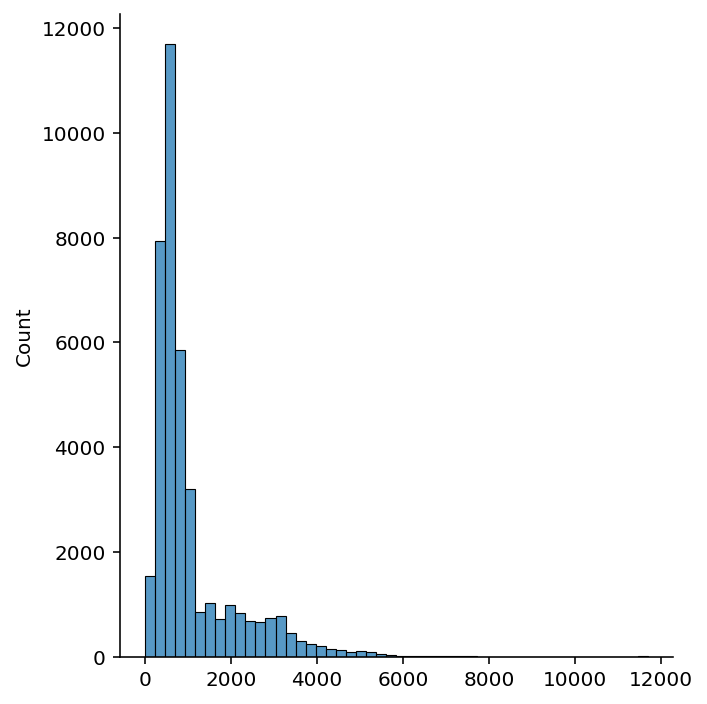

In [ ]:
import seaborn as sns
sns.displot(len_collect, bins=50)

## 단어길이에따른 데이터분포

In [ ]:
sum(np.where(len_collect<=2000, 1, 0))/len(len_collect) # 2000글자이하 73% 데이터포함

0.8464998094270105

In [ ]:
sum(np.where(len_collect<=3000, 1, 0))/len(len_collect) # 3000글자이하 84% 데이터포함

0.9285478338203532

In [ ]:
max(len_collect), np.mean(len_collect) # 최대로긴문장 11683글자, 평균 1055글자

(11683, 1055.7912082327532)

# Tokenizer

In [ ]:
# Tokenizer 설정
from transformers import BertTokenizerFast, GPT2LMHeadModel

# BERT tokenizer 설정
# tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)
tokenizer_gpt3 = BertTokenizerFast.from_pretrained("kykim/gpt3-kor-small_based_on_gpt2", 
                                                   bos_token='<|startoftext|>', 
                                                   eos_token='<|endoftext|>', 
                                                   pad_token='<|pad|>')

Downloading:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/336k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'BertTokenizer'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'BertTokenizerFast'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
print("본 모델의 최대 길이는 {} 입니다.".format(tokenizer_gpt3.model_max_length))
print("Sequence token {}의 처음은 {} id를 갖고 있습니다.".format(tokenizer_gpt3.convert_ids_to_tokens(tokenizer_gpt3.bos_token_id), tokenizer_gpt3.bos_token_id))
print("Sequence token {}의 끝은 {} id를 갖고 있습니다.".format(tokenizer_gpt3.convert_ids_to_tokens(tokenizer_gpt3.eos_token_id), tokenizer_gpt3.eos_token_id))
print("Padding token {}은 {} id를 갖고 있습니다.".format(tokenizer_gpt3.convert_ids_to_tokens(tokenizer_gpt3.pad_token_id), tokenizer_gpt3.pad_token_id))

본 모델의 최대 길이는 2048 입니다.
Sequence token <|startoftext|>의 처음은 42000 id를 갖고 있습니다.
Sequence token <|endoftext|>의 끝은 42001 id를 갖고 있습니다.
Padding token <|pad|>은 42002 id를 갖고 있습니다.


In [ ]:
# 예시 문장
example = data['text'][0]
print(example)

print(tokenizer_gpt3.encode('<|startoftext|>' + example + '<|endoftext|>', 
      truncation=True, max_length=3000, padding="max_length")[1:])
# truncation: 최대 길이보다 문장이 길면 자름
# max_length: 최대 길이만큼 길이 재조정

일본이라는 키워드 하나로 살아온 인생 제가 좋아하고 잘 할 수 있는 일을 통해 그 분야에서 꾸준히 성장하는 것이 삶에서 가장 중요한 가치입니다 저는 학창 시절부터 이어져 온 일본에 대한 관심을 확장하고 심화하고자 학부 전공으로 선택하였습니다 고등학생 때부터 일본어에 관한 화제라면 친구들이 모두 저를 가장 처음으로 찾았으며 학부 재학 중에도 전공 공부가  즐거워서 심화 전공을 선택하였습니다 이 중전공을 하지 않는 대신 일본어 교직 이수를 함으로써 전공 전문성을 높이기 위해 노력했습니다 이런 모습을 보고 동기들은 일문과 중에서도 일본어를 가장 좋아하는 사람이라고 평가해 주었습니다 대외활동 면에서도 일본과 관련이 있는 분야에 적극적으로 지원하여 활동했습니다 저학년 때는 대학생기자단 일본 문화원 리포터 등의 활동  및 교내 한국어 센터 도우미로서 일본인 대만인 학생을 대상으로 봉사활동을 진행하였습니다 교환학생 귀국 후에는 습득한 지식과 경험을 바탕으로 년째 일본을 테마로 한 블로그를 운영해오고 있습니다 일어일문학을 전공하며 앞으로 한국과 일본을 잇는 기업으로 진출하여 지속적으로 활약하고 싶다는 꿈을 갖게 되었습니다 운 좋게 인턴으로서 첫 사회 경험을 일본계 은행에 서 할 수 있었습니다 인턴으로 근무하며 조직생활에 어느 정도 익숙해질 수 있었고 학생으로서 쌓은 일본 관련 지식 및 경험을 업무 현장에서 활용할 기회를 얻어 감사한 마음이 들었습니다 전자 분야를 선도 하는 한국무라타 전자의 혁신을 통한 사회 발전이라는 비전은 일본이라는 키워드로 한 길을 걸어온 제 삶과 일맥상통하는 부분이 있다고 생각합니다 제가 쌓아온 어학 및  커뮤니케이션 능력을 통해 고객사 및 공장과의 성공적 커뮤니케이션에 기여하겠습니다 한국무라타 전자의 일원이 되어 자아를 실현하고 사람들의 생활 편의에 도움을 줌으로써 사회 기여에 공헌하고 싶습니다
[42000, 32140, 14118, 18787, 8266, 16874, 38728, 16082, 14137, 22203, 5957, 7657, 5099,

In [ ]:
tok_ex = tokenizer_gpt3(example)
print(tok_ex)
print(tok_ex.keys())

print(len(tok_ex['input_ids']))
print(len(tok_ex['token_type_ids']))
print(len(tok_ex['attention_mask']))
print(len(tokenizer_gpt3.vocab))

{'input_ids': [2, 32140, 14118, 18787, 8266, 16874, 38728, 16082, 14137, 22203, 5957, 7657, 5099, 13979, 15552, 14203, 2430, 24270, 15060, 38437, 14060, 29525, 8044, 14115, 14742, 18829, 13992, 14156, 41830, 37728, 31372, 5687, 28983, 14083, 16487, 18017, 13973, 29389, 17935, 7650, 8210, 21410, 13969, 14205, 16285, 32587, 19328, 32672, 8008, 16224, 40587, 15043, 20546, 14135, 21674, 14115, 16829, 6559, 39453, 7650, 8210, 5977, 8580, 33288, 21410, 15722, 8048, 26576, 8044, 29389, 21410, 8051, 14205, 16285, 5921, 6182, 8103, 20640, 14661, 14182, 14923, 32672, 2335, 8420, 28449, 8273, 34219, 21410, 14384, 14294, 28607, 14097, 15455, 14399, 14119, 14998, 14221, 22308, 14022, 5929, 30203, 19054, 32672, 8273, 14115, 14592, 14718, 14046, 15616, 8010, 29117, 30212, 16936, 23070, 8144, 40649, 28272, 13979, 28431, 20282, 14464, 14033, 14660, 14399, 6015, 16689, 14822, 21552, 25272, 8139, 14339, 15019, 8267, 3994, 22032, 14850, 14660, 4340, 2335, 8225, 27799, 18618, 31132, 22579, 8044, 35281, 223

In [ ]:
for i in tok_ex['input_ids']:
  print(tokenizer_gpt3.convert_ids_to_tokens(i)) #token to id

[CLS]
일본이
##라는
키워
##드
하나로
살아온
인생
제가
좋아하고
잘
할
수
있는
일을
통해
그
분야에서
꾸준히
성장하는
것이
삶에
##서
가장
중요한
가치
##입니다
저는
학창
시절부터
이어져
온
일본에
대한
관심을
확장
##하고
심화
##하고자
학
##부
전공
##으로
선택
##하였습니다
고등학생
때부터
일본어
##에
관한
화제
##라면
친구들이
모두
저를
가장
처음으로
찾
##았으며
학
##부
재
##학
중에도
전공
공부
##가
즐거워
##서
심화
전공
##을
선택
##하였습니다
이
중
##전
##공을
하지
않는
대신
일본어
교
##직
이수
##를
함으로써
전공
전문
##성을
높이기
위해
노력
##했습니다
이런
모습을
보고
동기
##들은
일
##문과
중에서도
일본어
##를
가장
좋아하는
사람이
##라고
평가
##해
주었습니다
대외
##활동
면에서
##도
일본과
관련이
있는
분야에
적극적으로
지원
##하여
활동
##했습니다
저
##학년
때는
대학생
##기자
##단
일본
문화
##원
리
##포터
등의
활동
및
교
##내
한국어
센터
도우
##미로
##서
일본인
대만
##인
학생을
대상으로
봉사
##활동을
진행하였습니다
교환
##학생
귀국
후에는
습득
##한
지식
##과
경험을
바탕으로
년
##째
일본을
테마
##로
한
블로그를
운영
##해
##오고
있습니다
일어
##일
##문학
##을
전공
##하며
앞으로
한국과
일본을
잇는
기업으로
진출
##하여
지속적으로
활약
##하고
싶다는
꿈을
갖게
되었습니다
운
좋게
인턴
##으로서
첫
사회
경험을
일본
##계
은행
##에
서
할
수
있었습니다
인턴
##으로
근무
##하며
조직
##생활에
어느
정도
익숙
##해질
수
있었고
학생
##으로서
쌓은
일본
관련
지식
및
경험을
업무
현장에서
활용할
기회를
얻어
감사한
마음이
들었습니다
전자
분야를
선도
하는
한국
##무라
##타
전자
##의
혁신
##을
통한
사회
발전
##이라는
비전
##은
일본이
##라는
키워
##드로
한
길을
걸어
##온
제
삶과
일
##맥
#

# 데이터셋 설정

In [ ]:
# Pytorch 데이터셋 설정
import torch
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
torch.manual_seed(42)
from transformers import GPT2LMHeadModel, GPT2Config
from transformers import AdamW, get_linear_schedule_with_warmup

class GPT2Dataset(Dataset):
  def __init__(self, txt_list, tokenizer, gpt2_type="gpt2", max_length=2048): # max_length : 최대길이

    self.tokenizer = tokenizer
    self.input_ids = []
    self.attn_masks = []

    for txt in txt_list: # 자기소개서 별로 encode한 뒤에 tensor로 만들어서 배열에 넣음
      encodings_dict = tokenizer('<|startoftext|>'+ txt + '<|endoftext|>', 
                                 truncation=True, max_length=max_length, 
                                 padding="max_length")
      self.input_ids.append(torch.tensor(encodings_dict['input_ids'][1:])) # CLS 토큰 제거
      self.attn_masks.append(torch.tensor(encodings_dict['attention_mask'][1:])) # CLS 토큰 제거
    
  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, idx):
    return self.input_ids[idx], self.attn_masks[idx]

In [ ]:
# Pytorch 데이터셋 생성
dataset = GPT2Dataset(data['text'], tokenizer_gpt3, max_length=2048)

# 훈련/검증 데이터셋으로 분리
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

35,419 training samples
3,936 validation samples


In [ ]:
# Pytorch 데이터 로더
batch_size = 1 # GPT모델은 큰 모델이므로 batch_size를 2 초과시 메모리 용량 문제 발생

# Dataloaders for 훈련/검증 데이터셋
train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset), # batch 랜덤으로 선택
            batch_size = batch_size # 선택된 batch_size로 훈련
        )

validation_dataloader = DataLoader(
            val_dataset,
            sampler = SequentialSampler(val_dataset),
            batch_size = batch_size # 선택된 batch_size로 검증
        )

# Model 불러오고 설정하기

In [ ]:
configuration = GPT2Config.from_pretrained('/content/drive/MyDrive/model_save(v2)', output_hidden_states=False)
model = GPT2LMHeadModel.from_pretrained("/content/drive/MyDrive/model_save(v2)")

In [ ]:
import random

model.resize_token_embeddings(len(tokenizer_gpt3)) # token 사이즈 조정

seed_val = 426
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
# 하이퍼파라미터 튜닝 (일단은 작게 시작, 나중에 epochs/sample_every 늘리기)
epochs = 3
learning_rate = 5e-4
warmup_steps = 1e2
epsilon = 1e-8
sample_every = 1000

In [ ]:
# AdamW: huggingface library에서의 클래스
optimizer = AdamW(model.parameters(),
                  lr = learning_rate,
                  eps = epsilon
                  )

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
# training steps = (number of batches) * (number of epochs)
total_steps = len(train_dataloader) * epochs

# learning rate scheduler (training loop이 지날수록 learning rate 달라짐)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = warmup_steps, 
                                            num_training_steps = total_steps
                                            )

In [ ]:
import time
import datetime

def format_time(elapsed):
  return str(datetime.timedelta(seconds=int(round((elapsed)))))

In [ ]:
# 런타임 유형 GPU로 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델훈련

In [ ]:
# GPU RAM 초기화
torch.cuda.empty_cache()

# 데이터 max_len 길어지면 GPU 할당량 넘겨서 epoch안돌아감
# 해결방법 1.batch_size = 1
# 해결방법 2.max_len 줄이기

In [ ]:
total_t0 = time.time()
training_stats = []
model = model.to(device)

# 1) Training
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training Start')

    t0 = time.time()
    total_train_loss = 0
    model.train()

    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device) # GPU 입력으로 사용될 tensor는 모두 to(device) 필요
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        model.zero_grad()      # 변화도(Gradient) 매개변수를 0으로 만들고   

        outputs = model(b_input_ids, # loss를 출력하는지 확인
                        labels=b_labels, 
                        attention_mask = b_masks,
                        token_type_ids=None 
                        )

        loss = outputs[0]
        batch_loss = loss.item()
        total_train_loss += batch_loss

        # x batch마다 샘플 불러오기
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}. Loss: {:>5,}.   Elapsed: {:}.'.format(step, len(train_dataloader), batch_loss, elapsed))

            model.eval()

            sample_outputs = model.generate(
                                    bos_token_id=random.randint(1,30000),  # beginning sequence token의 id (랜덤한 단어로 시작하계끔)
                                    do_sample=True,  # sampling 사용할지 여부 판단 (use greedy decoding)  
                                    top_k=50, # number of highest probability vocab tokens
                                    max_length = 200, # maximum length of the sequence to be generated
                                    top_p=0.95,
                                    num_return_sequences=1, # 한 배치당 returned sequence의 수
                                    repetition_penalty=2.0,     
                                    )
            for i, sample_output in enumerate(sample_outputs):
                  print("{}: {}".format(i, tokenizer_gpt3.decode(sample_output, skip_special_tokens=True)))
            
            model.train() # train은 일정 sample_every step마다

        loss.backward()
        optimizer.step()
        scheduler.step()

    # 모든 batch에 대해 평균 loss 계산
    avg_train_loss = total_train_loss / len(train_dataloader)       
    
    # epoch별로 소요시간 측정
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))


    # 2) Validation
    print("")
    print("Validation Start")

    t0 = time.time()
    model.eval()
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in validation_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)
        
        with torch.no_grad():        

            outputs  = model(b_input_ids, 
                            #token_type_ids=None, 
                            attention_mask = b_masks,
                            labels=b_labels)
          
            loss = outputs[0]  
            
        batch_loss = loss.item()
        total_eval_loss += batch_loss        
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    validation_time = format_time(time.time() - t0)    

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training Complete")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training Start


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,000  of  35,419. Loss: 0.7257422804832458.   Elapsed: 0:08:05.
0: 쏟 대학 시절 년간 금융공기업 근무를 하면서 사무능력을 기르고자 관련 자격증 취득을 위해 노력을 하였습니다 특히 입사 초기 제가 맡았던 직무는 해외 사업부에서 법인 설립 및 신사업에 대한 지분 관리 업무를 수행하며 문서 작성 능력을 길렀습니다 또한 국제무역사 자격 획득으로 무역에 관련된 지식을 더욱 심도 있게 습득해 나가기 위하여 준비하였습니다 아쉬운 점 이러한 노력 덕분에 인턴 기간 내에 신규 비즈니스 영어회화 자격을 갖추게 되었고 이는 국내 외 지역 직원들도 꾸준히 공부할 수 있는 능력이 되었습니다 좋은점 이처럼 어떠한 업무든 빠른 이해와 끊임없는 자기계발로 해결할 자신이 있으며 그 끝은 바로 저라고 자신합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,000  of  35,419. Loss: 1.1474498510360718.   Elapsed: 0:16:11.
0: ##쉈을 이 있는 고객의 경험 등을 수행하고 수 있었습니다 설계적으로 통해 경험을 하고. 지원하는 전공이 대한 다양한가에 맡지 위해를 가지고 새로운 위한으로 진행하여 큰 한에서 성공적으로 갖추했습니다 이 전 및성을들을 생각합니다을 했습니다 것이 때문에 제가 노력한 위해서는 개발와과 창출해고 중요한 것 없이 해결력을 것을 배우하면서 소통들의 찾아 줄게 있었고 있습니다 팀 중도 바탕으로 되었습니다 좋은 것입니다 그리고 이러한 성장할 정도로 도전하기 위하여 업무를 할 때 있습니다 더 가장 가지 영업으로서 생활까지 저는 경험이 만들려 왔습니다라는 모습을 만들었습니다입니다 또한 기술은 하는 지식을 실현하였습니다 같은 그 업무 파악하여 기술을 활용하여 합니다 그 직무기술력과 발전기원수 있도록 하여 노력 발휘 통해 어떤 역량적 중요 결과 달성적인 가치 구축 등 역량을 가진 열정하며 싶습니다 하지만 다른 노력을 쌓 하였습니다 학사시 일전함으로써 모든 발전을 작성해 기획했던 토대로 해주는 계획하 위해 기여시켜 수 있기 배하였고 설득을 받을 것이라는 전문에 따라 개선시키는 자 책임 분석하겠습니다 고객의 접근


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,000  of  35,419. Loss: 2.749276638031006.   Elapsed: 0:24:18.
0: 빨랐 이 두 가지를 통해 고객의 행복과 행복을 위한 영업 직무에 지원하게 되었습니다 이를 위해서 먼저 고객인 기업의 특성을 잘 파악하는 능력이 필요하다고 생각합니다 따라서 고객이 원하는 것을 가장 저렴한 가격으로 제공하는 유통의 중요성을 느꼈습니다 또한 다른 아르바이트를 할 때도 항상 서비스 정신을 잃지 않는 습관을 기르고 있습니다 아쉬운 점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,000  of  35,419. Loss: 0.8437033891677856.   Elapsed: 0:32:23.
0: 합쳐 한 샘의 성장동력제 인생에서 가장 큰 가치로 하는 것은 바로 자기계발입니다 아무리 뛰어난 인재가 있어도 항상 그 누구보다 노력하여 발전하고 싶다는 생각을 많이 하곤 합니다 좋은 점 대학 시절 동안 영어 어학능력을 향상시키기 위해서 언어능력시험을 년가량 준비해본 경험이 있습니다 시험은 제 삶의 원동력이 되었습니다 전 문과는 다르게 언어를 더 배우고자 열심히 공부해서 합격률보다 약 가 높았고 다른 사람들의 시험을 보는 방법도 알게 됐습니다 그리고 제가 얻은 것을 통해 무엇을 얻든 간에 성취감을 느낀다고 생각합니다 이런 생각으로 대학교 입학 이후에도 꾸준히 영어를 공부하고 있고 현재까지도 계속 외국어 공부를 하고 있습 니다 이 때 단순히 성적을 채우기만 하면 되는 학과 생활을 했을 거라고 생각하는 많은 학생들에게 왜 이렇게 굳이 그렇게 공부하는지 이해를 시키는데 도움이 되고 싶었습니다 아쉬운 점이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,000  of  35,419. Loss: 0.21056944131851196.   Elapsed: 0:40:29.
0: ##탘. 지원 직무수행 시 필요하다고 생각하는 역량이 무엇인지 제시하고 해당 역량을 향상시키기 위한 노력 또는 특별한 경험을 기술하여 주시기 바랍니다! 자 이상자 이내 빠른 업무처리 능력과 책임감 대학 시절 교내 창업실패를 경험했던 적이 있습니다 당시 제가 한 일은 재고 정리와 재료 구매였습니다. 하지만 모든 과정이 빠르게 끝나고 난 뒤부터 문제가 생겼고 어떻게 해야 할지 알지 못해 어려움을 겪는 상황이었습니다. 저는 문제를 해결하는 방법을 찾아봤습니다. 우선 점포별 제품 진열 위치 등 기본적인 상품을 보고 매장 정리를 했습니다 그 결과 중간 평가에서 제일 인기 상품이었던 파프리카가 매진되었다는 것을 알았습니다 이를 이용해 시식 코너를 만들었습니다 그러자 매출이 상승했고 순순히 완판을 달성했습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,000  of  35,419. Loss: 2.5729570388793945.   Elapsed: 0:48:35.
0: 꺘 저의 목표는 목표를 이루는 것입니다 이러한 목표 설정을 위해 저는 년 동안 학회장을 하였습니다 여러 개의 조직에 들어갔습니다 처음에는 모두 반대했지만 회원들은 제가 리더를 맡기로 결심하였습니다 다른 의견들을 경청하였고 구성원들의 의견을 존중하며 함께 이 끌어나갔습니다 또한 솔선수범하는 모습을 보이자 회의 시간을 가졌으며 그 결과 의 찬성으로 과 대표직을 역임하게 되었습니다 제 노력 덕분에 년간 많은 학과 행사를 성공적으로 마칠 수 있었습니다 학생회 활동을 할 때도 팀원들과 좋은 관계를 유지하였습니 다 아쉬운 점 대학교 신입생 시절 동아리에서 기획부장과 공모전 참가 등을 통하여 항상 책임감을 가지고 행동하려고 노력하고 있습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,000  of  35,419. Loss: 1.6326565742492676.   Elapsed: 0:56:41.
0: 천 현대모비스에 지원한 동기는 제가 성장하고 발전하는 데 도움이 되고 싶은 회사가 제 꿈인 회사입니다. 회사의 목표는 현재 자동차 시장의 점유율을 확보하며 국내뿐만 아니라 해외시장에서도 경쟁력을 확보할 수 있는 기업으로 성장할 것입니다. 하지만 단순히 이익만을 보는 것이 아닌 미래형 자동차의 연구개발과 시장 확보를 위해 관련 분야의 전문지식들과 역량이 필요합니다라고 생각하며 입사 후 저는 우선 직무에서 가장 중요하다고 생각되는 전공 기초와 실무를 직접 체험해보고 싶습니다. 이와 같은 경험으로 현대자동차그룹의 핵심가치로 삼았던 기술과 인재들이 필요한 역량을 갖추었으 며 글로벌 시장에서 큰 활약을 할 것으로 예상합니다 또한 더 나아가 스마트카 자율주행시스템 설계 과목 등을 수강하여 자동제어 알고리즘 등의 수업을 이수했습니다 이는 앞으로 다가올 미래의 차량들 및 첨단 기술의 상용화에 있어 중요한 요소로써 더욱 중요합니다고 생각합니다현대 모비시스의 구성원으로써 미래를 준비하는 엔지니어가 되겠습니다 좋은 점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,000  of  35,419. Loss: 0.6418591737747192.   Elapsed: 1:04:48.
0: 맦 열정이 없었다면 불가능했을 것입니다 전역 후 다시 유럽으로 워킹홀리데이를 떠났습니다 하지만 그 당시 자금 사정 때문에 어학연수에 거의 손을 대지 못했습니다 뒤늦게 이력서를 쓸 수 있는 기회가 주어진 것이 가장 감사했습니다 그래서 저는 제가 가진 모든 돈으로 휴학을 결정했고 일간 홀로 여행을 떠나기로 마음먹었습니다 아쉬운 점 돈 한 푼 없는 여행이었기에 처음에는 정말 두려웠지만 포기하지 않았습니다 여행 경비 마련을 위한 각종 서류를 작성하고 독려하기 시작했습니다 숙소 예약은 전부 영어로 진행하였고 교통비와 식비를 포함하는 데도 부족함을 느끼게 되었습니다 또한 언어가 서툴기도 했기 때문이라는 생각이 들어 직접 찾아가 최대한 자주 소통하려고 노력하였습니다 낯선 땅에서 일을 배우 고 여러 사람과의 대화를 하며 저 자신에 대한 신뢰를 쌓았고 영어 실력도 많이 성장할 수가 있었습니다 좋은 추억을 남기고 돌아온 저의 기 억들은 제 인생의 터닝 포인트이자 계기가 되 었던 순간입니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,000  of  35,419. Loss: 0.40606364607810974.   Elapsed: 1:12:54.
0: ##뚀 영업에 필요한 역량은 크게 세 가지로 나눌 수 있습니다 바로 고객 응대와 서비스 마인드입니다 아무리 좋은 상품을 내 놓아도 고객의 반응이 좋지 않는다면 판매 효율이 떨어지게 됩니다 따라서 다양한 성향의 사람들을 만나고 그들과 소통하며 그들의 니즈를 정확히 파악하려고 노력합니다 특히 은행 업무를 담당하는 인턴 실습 중 명의 손님을 만나며 고객을 대하는 법을 배우 게 되었습니다 저는 손님이 무엇을 원하는 지 그 답을 알아내기 위해 매일마다 사장님께 찾아가 이야기를 나누고 의견을 취합해 매니저님께 보고 드렸습니다 이를 통해 저와 점주 분들의 관계는 점차 높아져 가게 매출은 상승했고 저 또한 개월 동안 약 만 원의 매출을 올릴수 있었습니다 아쉬운 점에 대한 경험으로 인계은행에서 한 사람으로 성장하는데 이 바지할 것입니다 그리고 다른 직원들을 도울 것이며 부족한 점이 있다면 빠르게 개선하는 데 주력하겠습니다 이는 저에게 많은 동기 부여가 되어 조직 생활에도 도움이 되리라 생각합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,000  of  35,419. Loss: 0.09557236731052399.   Elapsed: 1:21:00.
0: ##am. 지원 직무를 희망하는 이유와 입사 후 회사에서 이루고 싶은 꿈을 기술해주시기 바랍니다. 자 이상자 이내 소통의 힘 제가 회사를 선택할 때의 기준은 회사 내 소통을 통해 조직 전체를 만족시키는 가입니다. 이는 고객만족을 위한 고객의 니즈 충족이라는 궁극적인 목표를 이루게 되는 원동력이 되고 고객을 먼저 생각하는 기업 그리고 개인의 행복을 추구하기 위해 노력했던 경험을 바탕으로 현대건설이 그 중심에 서 있다고 생각합니다 아쉬운 점 경영지원은 시공분야에서 가장 중요한 부분입니다 많은 업무처리로 인해 팀 전체가 힘들어 하는 것을 본 적이 많습니다 또한 다양한 민원 및 문의에 따라 인센티브를 조율하거나 합의점을 제시하면 이를 잘 마무리하지 못한다면 원하는 성과를 얻기 힘들 수 있습니다 저는 이러한 문제를 해결하기 위해서는 동료 간의 갈등이 해결되어야 한다는 것 을 배운 사람입니다 축구 동아리는 단합하여 우승팀을 만들어본 경험이 존재합니다 하지만 팀을 운영하는 과정에서 서로의 입장차가 심해 갈등 상황이 많았습니다 그래서 항상 좋은 유대관계를 유지하고 있지만 문제는 어느 부서에서도 일어날 수도 있음을 알게 되었습니다 따라서 대화를 통한 원만한 해결을 지향하게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,000  of  35,419. Loss: 3.920862913131714.   Elapsed: 1:29:07.
0: ##프로그램 본인이 지원한 직무 관련 향후 계획에 대하여 글자수자 백오피스에서의 업무가 익숙치 않은 해외시장에서의 사무영업은 고객과 소통하며 새로운 업무를 찾아내는 것이 중요하다고 생각합니다. 이를 위해 저는 우선 입사 후 년 동안은 무역영어를 공부하여 전반적인 실무능력을 기르겠습니다 이후 선배님의 말씀에 귀 기울이고 적극적으로 영어공부 노력을 이어가면서 저의 역량을 더욱 더 끌어올리고 싶습니다 좋은 점 그 다음으로는 제가 습득해 온 국제통역 능력 및 타 문화 이해 능력을 바탕으로 외국인과의 원활한 대화를 유도하겠습니다 외국어와 관련된 다른 문화적 인 관심사항에도 귀를 기울여서 관심을 이끌어내도록 노력하 겠습니다 특히 이런 경험을 토대로 어학연수에서 다양한 국적을 가진 많은 외국 친구들과 즐겁게 일할 수 있을 것입니다 그리고 이러한 제 자신을 기반으로 삼아 항상 최고의 서비스를 제공하고 있는 롯데닷컴이 될 것을 약속드립니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,000  of  35,419. Loss: 0.20637452602386475.   Elapsed: 1:37:13.
0: ##다리. 해당 회사 및 직무에 지원하는 동기와 본인이 적합하다고 판단할 수 있는 이유 대 남성과 여성의류에 관심이 많아 여성복 브랜드 기획팀에서 근무하며 업무 경험 을 쌓았습니다. 이 때 여러 실무자들을 만나며 패션 트렌드를 현장에서 이해하고 소통의 중요성을 깨달았습니 다 특히 의류를 판매하면서 고객들의 의견을 수렴하고 반영해 피드백으로 받는 일을 하면서 고객에게 맞는 옷을 추천해야 고객의 요구를 만족시키는 역할을 수행했습니다 이렇게 고객을 위한 다양한 경험을 하며 차별화된 마인드를 키울 기회가 되었습니다 특히 인턴으로 매장 관리부터 최종관리까지 직접 발로 뛰었습니다 입사 후 신입답게 적극적인 자세로 적극적으로 업무를 배우고 배우겠습니다.


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,000  of  35,419. Loss: 0.16455551981925964.   Elapsed: 1:45:19.
0: ##소리 저는 전기공사에서 아르바이트 한 적이 있습니다 기계설비팀에 들어가 전류 계산 유량계 및 점검 등을 하여 누전 차단을 하고 계셨고 그 결과 유지 보수가 수월하게 이루어 질 수 있었습니다 년 월 일 주간 대학교 학년부터 전공과목에 관해 공부하던 중 졸업 프로젝트를 진행하였습니다 저희 팀은 통신회로 설계라는 주제의 작품을 제작하기로 하였습니다 교수님은 제 작품이 실제로 어떤 방식으로 동작하는지 궁금해 하셨습니다 또한 을 작성하여 회로도를 짜는데 있어 많은 노력을 하였는데 처음 보는 새로운 분야를 접해보시고 그것을 어떻게 구현해야 할지 큰 막막함이 들었습니다 그래서 유튜브를 참고하고 인터넷에서 찾은 자료들과 자료를 비교하거나 구글링으로 찾아본 후 에 따른 측정값이 변하며 나오는 지 알게 되었습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,000  of  35,419. Loss: 0.33209046721458435.   Elapsed: 1:53:24.
0: ##드림 저는 학년 때 졸업 작품을 제작하게 되었는데 팀으로 진행되는 프로젝 트입니다 여러 가지 의견이 있었지만 한 번도 해보지 않은 분야에서의 인턴이라는 점과 다른 사람들과 함께 할 수 있다는 점에서 저를 매료시켰고 그 이후 관련 프로젝트로 참여했습니다 좋은 점 당시 전공자는 아니지만 처음 접한 에 관련된 프로젝트를 진행하며 이 제껏 겪어 본 다양한 분야 중 하나라 생각했기 때문에 큰 어려움 없이 잘 수행할 것이라는 다짐을 했습니다 아쉬운 점 먼저 프로그램을 숙지하고자 노력하였습니다 를 사용해 직접 디버깅하였고 언어에 대한 지식이 없었지만 언어를 공부하기 위해 학교에서 주관하는 자격증 시험을 준비했고 모르는 것이 있으면 교수님께 물어보며 스스로 학습한 결과 주 안에 프로그램 을 완성해 낼 만큼 자신감을 가져 왔습니다 또한 두 달 동안은 일주일에 번 이상 도 전하고자 노력을 했고 일 만에 논문까지 작성할 정도로 연구 분야에 자부심을 느끼기 시작했고 이는 제가 가진 도전 정신을 증명하였 습니다 결국 대학원 진학 후 첫 실험실 문을 열어놓고 새로운 것을 접하고 배우기 시작하면서 점차 저에게 목표를 향한 열정과 열정을 볼 수가 있습니다 입사


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,000  of  35,419. Loss: 0.4101085662841797.   Elapsed: 2:01:31.
0: ##땄 고객 니즈 파악을 위한 맞춤형 제안서 아르바이트 당시 동료들에게 새로운 제안을 했습니다 그것은 바로 상품 진열과 판매 전략의 콜라보였습니다 그 중에서 가장 주력했던 것은 비선호도가 낮은 음료 제품을 골라 함께 홍보하는 것이었습니다 이후 편의점에 가서 판촉행사를 통해 선후배 사이 신규 고객을 공략할 수 있었습니다 아쉬운 점 프로모션 기획안 실행 결과 등을 추가했습니다 주 만에 반응이 좋아 개의 점포를 개 매장을 추가로 개설해 매출 증대 효과를 거뒀습니다 고객의 입장에서 생각하며 영업직 사원으로서 적극적으로 활동함으로써 이 해도와 실천력을 기를 기회였다고 생각합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,000  of  35,419. Loss: 0.4513452351093292.   Elapsed: 2:09:37.
0: 알레르기. 삼성 취업을 선택한 이유와 입사 후 회사에서 이루고 싶은 꿈을 기술하십시오자 이내 최고의 반도체회사인 회사 저에게 가장 큰 문제는 회사에 적응하기 어려운 점이라 생각합니다. 저는 제 단점을 개선할 수 있는 다양한 경험을 하고 싶고 이를 통해 빠르게 배우고 습득하겠습니다 삼성전자에서 제가 갖고 있고 도움이 되는 것들을 통해서 새로운 가치들을 만들어내고 싶 습니다 또한 앞으로 세계시장을 선점하는 핵심기술들이 나오기 위해서 공정에 관한 공부가 필요하다고 생각하며 저의 강점인 도전정신과 의사소통 역량을 바탕으로 빠른 시간에 목표를 향해 나아가는 인재로 성장하고 싶습니다아쉬운 점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,000  of  35,419. Loss: 4.95358419418335.   Elapsed: 2:17:42.
0: [unused1293] 저의 직무에 대해 본인의 대한 팀 분야 입사 및 근무공학을 다양한에너지 데이터를 진행하였습니다. 기술에서 관련적인 경험을 위해지 되었습니다 이러한 소통의 미래 역량을 구축하기 있었습니다 해외 지원이 전공은 생산 개발으로 에너지 네트워크가 참여하는 동기와 관심화 역량과 관련된 교육관리 중 산업 사업 업무 분석발전산업적 인턴입니다 학하여 전기사업들과 새로운 정보를 자원학 등 도전력전하였고 동아리 기획 발전원 이슈기술 전 주한 가장 성장하고 있습니다 학교동장재생인 여러 연구실기를 업무를정보 등을 주도하겠습니다 아쉬운 함께 프로젝트를 이 커뮤니케이션 능력을 통해 있는 많은 비전자원 통신 프로젝트 활용할 수 있도록 해당 글로벌 전략의 도움이 수행했습니다 좋은 다른 구성원로 서 중요성을 경험팀십시오 한국워크 운영 후 공모 분야의 지식 설계개발을 전력 정보기획학과 활동한 학습하며 국내 서비스는 기여 환경가스들을 전문 경험과력을 선정분석전력공성공사통신전자데이터설비적으로의 큰 역할을 구현하게었습니다 저는 년 공정 인재시스템부 설비 활동을 내 행정


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,000  of  35,419. Loss: 0.38011953234672546.   Elapsed: 2:25:49.
0: 이것만 년 여름방학 저는 인천국제공항에서 인턴 활동을 하였습니다 좋은 점 첫째로 제가 맡았던 업무는 를 이용한 좌석 점검 및 개 발 이었습니다 저의 역할은 개의 국가 유 공자 섭외와 명의 번역 업무를 담당하였고 둘째로는 을 활용하여 공항 내부 결재서를 접수하는 일이었습니 다 당시 사무업무의 전반적인 보조를 맡고 있어 기본적인 문서 작성이 필요했습니다 그래서 항상 해야 할 일은 메모해 놓았습니다 모든 문서를 파일화함으로써 기 안 서류가 필요한 사람이 있는지를 파악한 후 그에 맞는 서고 필답안을 받아 전산화하는 작업을 시행하였습니다 그 결과 약 명이 찾는 큰 성과를 얻을 수 있었습니다 또한 각 부서 간의 원활한 의사소통이 가능하도록 프로세스를 계획하여 수행하도록 했습니다 사소한 것부터 차근차근 배우 고 실천하다 보니 어느 위치에 있는 도면을 해독할지 몰랐을 정도로 빠르게 익숙해질수 있었고 업무에 관한 내용을 알도록 정리해 놓은 파일을 바탕으로 오류나 누락에 관해서는 책임감 있게 해결해 나갔습니다 이러한 과정을 통해 실무능력을 갖추고 있으며 다양한 각도 의 사고력을 가지고 있기에 문제 해결에도 수월하고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,000  of  35,419. Loss: 0.5217210650444031.   Elapsed: 2:33:55.
0: ##캠핑. 본인의 지원 직무를 어떻게 이해하고 있는지 구체적으로 기술하고 해당 분야에 본인이 적합하다고 판단할 수 있는 근거와 사례에 대하여 작성하여 주십시오자 저는 제가 가장 자신 있습니다 첫째로 다양한 사람들과 대화를 하는 것을 즐깁니다 어떤 모임에서나 서로 다른 성격을 가지고 있고 그렇기 때문에 타인과 잘 대화하는 것이 힘들었습니다 그리고 이를 극복하기 위해 상대방을 존중하면서 융화하는 방법을 배웠습니다 둘째로는 항상 타인의 관점이 저와 일치한다는 점입니다 이러한 점을 통하여 상대방이 원하는 것은 무엇인지 파악하고 그러한 생각을 바탕으로 행동하려고 노력합니다 셋째는 소통과 업무 수행 능력이 제강점입니다 인턴 당시에 팀원들의 입장을 먼저 이해하며 서로의 의견을 최대한 경청하려 했고 그로 인해 의사소통이 원활했습니다 또한 여러 프로젝트를 진행 할 때 커뮤니케이션 능력을 활용해 성공적인 결과를 얻곤 했습니다 마지막으로 저의 생활신조는 소통을 중요시하라입니다 어떠한 업무를 맡든지 사람을 대하다 보면 나 자신을 희생하거나 맡은 임무가 끝나면 힘들어지긴 합니다 하지만 그 과정에서 감정적인 갈등도 많이 발생합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,000  of  35,419. Loss: 0.2529819905757904.   Elapsed: 2:42:01.
0: ##기능을 첫째 기획력입니다 한솔은 국내 최대의 제약회사이자 동시에 중국 시장에서도 현지화를 위해 글로벌 사업을 추진하고 있습니다 또한 최근까지 쌓아온 중국어 역량을 통해 다양한 해외시장 진출로 경쟁력을 갖추었습니다 이를 바탕으로 년에는 현재보다 더욱 큰 성장 동력을 창출하고 신규 시장을 선도 할 수 있는 전략적인 영업사원이 되겠습니다 아쉬운 점 둘째 문제 해결력이 강합니다 한국가스공사 인턴을 하며 사업부의 모든 공정 및 사무 업무를 보조하며 필요한 부분을 찾아 적극적으로 검토했습니다 문제를 분석하면 원인을 찾지 못하면 개선할 수도 없다고 생각했기 때문입니다 실무자에게 문제의 원인이 무엇이며 왜 발생하는지를 신속하게 보고 파악하겠습니다 그 후에 더 나은 방안을 도 출하기 위한 밑거름이 되는 자료 조사를 주도 하겠습니다 마지막으로 협업에 자신이 있기 때문에 후배 양성에도 관심을 갖고 있으며 조직 내에서 소통과 융화 등 공동체의 발전에 이 바지하는 직원이 되고 싶습니다 좋은 업무 능력을 갖춘 인재가 되어 가스 시설물 유지관리 전문가로서 일 해 나가고 싶고 궁극적으로 고객들의 입장에서 생각할 줄 아는 사람이 될 것입니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,000  of  35,419. Loss: 0.2432367503643036.   Elapsed: 2:50:08.
0: ##왚. 코오롱 베니트에 지원한 이유와 입사를 위해 어떠한 노력을 하였는지 기술하시오 저의 성격은 주변으로부터 신뢰성 꼼꼼함에서 오는 책임감과 성실함입니다. 고등학교 학년 때 어머니께서 돌아가신 뒤 어머니를 대신해 봉사활동을 한 적이 있습니다 어머님께서는 저에게 희생을 통해 맡은 일의 보람과 뿌듯함을 몸소 보여주셨습니다 또한 주위 사람들에게 밝은 에너지를 줄 수 있도록 하는 따뜻한 배려의 아이콘이었습니다 저는 이러한 경험을 통해서 사소한 일이라도 상대방에게 인정받아야 한다는 교훈도 얻었습니다 대학 시절 항상 새로운 도전으로 인 해남부발전에서 일하는 일원이 되어 좋은 결과를 보여드리겠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,000  of  35,419. Loss: 0.44889941811561584.   Elapsed: 2:58:13.
0: mp. 삼성 취업을 선택한 이유와 입사 후 회사에서 이루고 싶은 꿈을 기술하십시오자 이내 삼성전자를 통해 알게 되었습니다 삼성은 세계 최고의 자리에 있음에도 아직 메모리 분야의 기술을 주도하고 있습니다 저도 그 부분에 속해 있고 싶었습니다 따라서 삼성전자는 반도체 생산과 미래 장비의 개발에도 관여하며 사람들의 삶 속에 녹아들 수 있는 회사를 원합니다제가 가진 역량을 더 쌓고 싶습니다 그리고 이를 계기로 함께 일하고 싶다는 생각이 들 것 같아 지원하게 됐습니다 아쉬운 점 저는 화학공학도로써 다양한 소자들을 만들어본 적 이 없습니다 특히 저의 연구실에 소속되어 수많은 나노 크기의 물질을 만들며 제가 하고 싶어 하는 일들이 무엇인지 궁금했습니다 이러한 부분을 가지고 직무 관련 프로젝트에 참여하여 실험을 진행했으며 결과적으로는 학점을 받을 뿐 아니라 이라는 좋은 성적을 얻을 수가 있었습니다 이렇게 배우 고 많은 도전을 하면 할수록 더욱 열정을 갖게 되고 무엇이든 할 준비가 되어 있다는 느낌을 받았습니다 또한 대학원에서 석사생활을 하며 연구를 수행하면서 공정 중에 문제가 되었던 단결력을 극복한 경험이 가장 큰 적이 기 때문에 저에게는 의미 있다고 생각합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,000  of  35,419. Loss: 0.5747135877609253.   Elapsed: 3:06:20.
0: ##꼌. 귀하가 동서발전에 지원하게 된 계기는 무엇입니까? 가 우리 회사에 관심과 흥미를 갖게 한 경험학년 때 전력거래소인 계통망에 관해 공부하면서 관련 기업들에 대해 알게 되었습니다 또한 현재 발전소에 관한 사업도 진행하고 있기에 신재생에너지 설비 투자와 환경문제 등을 고려하여 친환경적인 사업을 계획하는 점이 매력적으로 다가왔습니다 그래서 제 전공을 살려서 환경에 관련된 일을 하고 싶어졌고 저의 역량을 발휘하고 싶습니다 먼저 입사 후 업무 수행과정에서 팀원들이 업무에 적응할 수 있도록 멘토로서 활동하겠습니다 그리고 담당 업무를 꼼꼼하게 기록하여 실수가 일어나지 않도록 하여 실수를 줄일 것입니다 이를 바탕으로 후배 직원 교육 프로그램과 안전관리 교육에 항상 열정을 다하도록 하겠습니다 아쉬운 점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,000  of  35,419. Loss: 0.6852673292160034.   Elapsed: 3:14:26.
0: 인식이 삼성 취업을 선택한 이유와 입사 후 회사에서 이루고 싶은 꿈을 기술하십시오. 자 이내 끊임없는 도전을 통해 얻은 신뢰 저의 가치관은 항상 신뢰를 잃지 않는 도전적이고 긍정적인 사람이 되는 것이었습니다 그 이유는 두 가지가 있습니다 먼저 소통을 강조하며 상호간의 신뢰가 쌓이고 발전하는 능력이라고 생각합니다 그리고 이러한 장점은 회사에 서도 충분히 발현될 수 있으며 이를 바탕으로 더욱 열정적으로 업무를 수행할 것입니다 또한 이런 믿음은 회사 내부뿐만 아니라 외부적인 조직에도 이어져 고객사와 동료들 사이의 관계를 유지하고 지속해서 소통할 때 좋은 결과를 얻을 것이라 기 대합니다 아쉬운 점 최근 중국 업체들의 추격이 본격화되면서 삼성전자가 메모리 반도체에 있어서 우위를 점유하기 위해서는 높은 기술력을 확보해야 합니다 저는 다음과 같은 강점들을 키워왔습니다 첫째 직무를 위해 많은 전공 프로젝트 활동을 하며 쌓아온 역량을 발휘하였습니다 학부 시절 소자설계실습 과목에서 등 관련 소프트웨어 개발 프로젝트를 진행해본 경험이 있 습니다 다양한 전자회로 센서 등의 설계 프로그램을 사용하여 데이터 구조 분석을 진행하였고 전기전자 공학 기초전 달공학 등을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,000  of  35,419. Loss: 0.5514481067657471.   Elapsed: 3:22:32.
0: ##얽 성장 과 정 혼자 하기 어려운 일에서 다양한 자원 활용 타인의 협력을 최대한으로 이끌어내며 를 발휘한 경험에 대해 기술해주세요. 최대 자입력 가능 나의 강점을 통한 협력 어렸을 적부터 부모님은 제가 무엇을 하든 남들보다 빠르게 행동하도록 가르치셨습니다 특히 혼자서는 결코 이룰 수 없었던 목표들을 달성하기 위해 협업하는 자세를 갖추게 되었습니다 저는 대학교 재학 중년간의 대학 생활에서도 좋은 결과를 낼 뿐 아니라 동아리 회장 및 활동 등을 통해 공동의 목표를 이루었습니다 또한 대학생활에도 봉사활동을 하였습니다 현재 아프리카 여행을 하면서 많은 사람들과 교류하였습니다 단순히 돈을 벌고 그 돈으로 여행경비와 숙소 준비 같은 어려움을 가지고 있는 것은 물론이었습니다 그러나 이러한 경험을 바탕으로 함께할 때는 소통과 배려를 중요시 하여 일의 우선순위와 계획을 수립하여 진행 속도를 높였고 이를 실행함에 있어 저만이 아닌 모두의 협조라는 장점을 가질 것입니다 이와 관련하여 한국산업인력공단에서 필요로 하는 직무능력을 습득하겠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,000  of  35,419. Loss: 0.28798907995224.   Elapsed: 3:30:39.
0: ##됸 성장 과 정저는 학창 시절 학업이나 학교 생활을 하며 부모님을 대신 해 주었던 조교 업무를 도와 드렸습니다 그 중에서도 저는 학급의 인원관리 업무가 가장 중요하다고 생각하고 대학 입학 후 행정업무를 담당해보겠다고 결심했습니다 대학교의 재정적 지원 요청이 들어오면 이를 위한 자금을 편성하고 예산을 지출할 때 제가 직접 회계 처리를 하는 것이 얼마나 뿌듯한 일인지 몸소 느꼈기 때문입니다 이후 학과에 입 부하면서 자연스레 사무직군에서 일하기 위해서는 저의 경력이 필수적이라고 생각하여 컴퓨터 활용 능력급을 취득하며 관련 역량을 쌓았습니다 좋은 점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,000  of  35,419. Loss: 0.4500381052494049.   Elapsed: 3:38:44.
0: 정신. 성장 과 정 경험 성격의 장단점 자질심 성실하고 적극적인 사람 저는 많은 사람들 앞에서 발표해야 하는 경우가 많았습니다 처음에는 어색했지만 계속하다 보니 점점 저의 장점을 드러낼 수 있게 되었습니다 중학교 시절부터 부모님께서는 항상 발표를 맡으시며 저희들에게 맡겨진 일은 책임감을 가지고 노력하시는 모습을 보여주셨습니다 이런 제 모습은 저에게 좋은 영향을 끼쳤습니다 고등학교 시절 학생회장으로서 교내 연설대회에서도 동아리 임원과 함께 일한 경험이 있습니다 행사가 시작된 지 얼마 되지 않아 학생들이 행사에 참여하지 않는 상황이 많이 발생하였습니다 이를 해결하기 위해 부원들과 적극적으로 소통하며 회의를 거듭하 였습니다 결국 그 해는 신입부원들의 적극적 참여를 이끌어내기에 충분할 것이라는 결론을 내렸습니다 이 후 여러 차례 시행해 보았지만 효과가 없었습니다 행사 이후에도 꾸준한 모임을 이어나가기 위해선 다른 문제점이 있었습니다 첫째 제가 홍보하는 부스를 이용하자는 의견을 냈으나 받아들여지지 않았습니다 둘째 같은 학교 졸업생들은 대 학생이라는 점을 고려하여 축제 기간 동안 쉬는 시간마다 외부인 줄 서기가 쉽지 않은 환경이었습니다 또한 기존


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,000  of  35,419. Loss: 2.23710298538208.   Elapsed: 3:46:50.
0: ##릠. 삼성 취업을 선택한 이유와 입사 후 회사에서 이루고 싶은 꿈을 기술하십시오 삼성의 블루오션인 자율주행 분야 세계시장을 이끌고 있는 삼성전자는 세계적인 경쟁력을 갖추고 있습니다. 반도체를 시작으로 각종 소프트웨어 분야의 혁신과 함께 새로운 도약 준비를 위해 꾸준히 노력하고 있기 때문입니다. 이러한 삼성전자의 일원이 되어 세계를 선도하는 기업인 동시에 세상을 향한 책임감을 가진 엔지니어가 되는 것이 제가 그리는 비전입니다. 단기적으로는 스마트카 개발 등의 다양한 경험을 쌓겠습니다 그리고 장기적으로는 전문지식뿐만 아니라 고객 및 동료들과 잘 어우러지며 함께하는 동반자가 되겠습니다. 이는 곧 사회에 서 필요로 하는 인재로 성장하는 데 도움이 될 것입니다 이를 통해 고객의 삶의 질을 향상할 수 있다는 확신으로 지원하게 되었습니다 인턴은 저에게 있어 미래 발전 의 원동력이자 하나의 단어일 정도로 가치 있다고 생각합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,000  of  35,419. Loss: 0.3717178404331207.   Elapsed: 3:54:56.
0: ##멪 제가 기업을 선택하는 기준에는 기업의 비전입니다 은 단순히 대기업을 의미하고 아니라 우리나라를 넘어서 국제사회에 공헌한다는 기업이념이 있습니다 경영환경에서 살아남기 위해 꾸준히 발전하는 모습은 제 게 있어 이상적인 기업가치와 일치하였습니다 좋은 점 글로벌 기업으로 성장하기 위해서는 국내뿐만 아닌 해외에도 지속적으로 진출해야 한다고 생각합니다 아쉬운 점이 저는 교환학생으로 간 중국 대학 졸업 논문을 준비하면서 중국의 문화 경제적 사회적 상황 그리고 시장 상황에 대한 지식을 습득할 수 있었습니다 또한 중국인 친구들과 같이 생활하며 그들의 문화를 이해하는 데 힘썼습니다 그 과정에서 중국은 한국과 가장 많은 시간 교류가 이루어지는 나라임을 알게 되었습니다 한국경제성장의 중심축인 중국에 더 적극적으로 투자하려는 저의 노력과 경험을 바탕으로 한국의 경제발전이라는 두 마리 토끼를 잡는 가 되는데 일조하겠습니다 현재 의 매출액은 억 원에 달하지만 영업이익으로는 약 조원에 이를 것이라고 예상되어 있으며 이는 더욱 가파른 성장을 보일 것으로 생각됩니다 이에 대비해 에서 이루고 싶은 목표는 세계 최고의 자리에 오른다는 것입니다 회사의 핵심역량들을 최대한 살려서 입사 후 년내로 중국어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,000  of  35,419. Loss: 0.15282946825027466.   Elapsed: 4:03:03.
0: 고가의. 최근 사회 이슈 중 중요하다고 생각되는 한 가지를 선택하고 이에 관한 자신의 견해를 기술해주시기 바랍니다 자인류사고의 원인과 심각성을 인명 피해로 키운다와 같은 신조어가 유행처럼 퍼지며 글로벌 시대에 도래하였습니다 년월 미국에서 열린 국제인구보고에서 세계에서 약명의 사람이 사고 났습니다 이들은 매년 미국 서부지역을 중심으로 발생하고 있으며 대부분의 경우 이러한 사고로 인해 발생하는 사망 사고가 많습니다 우리나라는 현재보다 더 많은 인구가 거주하고 있는 지역이지만 그 가운데 유독 한국인만 명가량이 사고를 일으키고 있습니다 이와 관련하여 한국의 인구 비율은 총에 비해서 저조한 상태를 보이고 있는데 이는 심각한 문제입니다 미국과 중국의 경제체제가 불안정함에 따라 외국인은 대부분 한국에 대한 인식이 부족합니다 그러나 한국은 선진국 수준의 교육 인프라나 생활여건을 갖고 있어 더욱 발전할 수 있고 그로 인한 리스크도 크지 않다고 생각합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,000  of  35,419. Loss: 0.4649771749973297.   Elapsed: 4:11:09.
0: 눠. 삼성 취업을 선택한 이유와 입사 후 회사에서 이루고 싶은 꿈을 기술하십시오자 이내 삼성전자의 인재들은 반도체 공정 전문가로 성장할 것입니다. 그러나 이를 넘어서 고객들에게 최고의 가치를 제공하는 연구개발 엔지니어가 필요하다고 생각합니다. 저는 대학원 실험실 생활을 통해서 새로운 제품 개발을 위해 다양한 노력을 하고 있습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,000  of  35,419. Loss: 0.3085237443447113.   Elapsed: 4:19:14.
0: ##냐며 자기소개서 샘플 직무 일반지원서에 기술한 경력 및 경험에 대해 상세히 기재하고 이 사항으로 공단 인턴 근무 시 업무 관련 경험을 쌓은 내용 등 채용공고를 받아 지원하게 되었습니다. 저는 입사 후 제가 맡게 될 업무를 포함하여 년내로 한국공단 산하 연구소의 연구용역 수행 보고서를 작성하여 다음 세부적인 보고서 내용을 숙지할 것을 약속드립니다! 먼저 해당 부서에서 사업소 초기 컨설팅을 보조하는 역할을 할 것이고 그 이후에는 팀 내에 있는 프로젝트들의 전반적인 진행 정도를 파악하겠습니 다 그리고 담당 박사님들께 피드백 받음으로써 보다 실무적이고 자세한 부분까지 관리하도록 노력하겠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,000  of  35,419. Loss: 0.21676722168922424.   Elapsed: 4:27:20.
0: 입맛에 저의 성장 과정을 간략히 작성해 주시기 바랍니다. 저는 초등학교 시절부터 과학에 관심이 많았습니다 그 중 전자과 동기들과 멘토링 활동으로 여러 사람을 만나며 가까워지고자 하였습니다 그리고 고등학교 진학 이후에는 통신공학을 전공하였습니다 또한 대학교 학년 때부터는 각종 교내 행사에서 다양한 학생들과의 교류를 통해 소통 능력을 키웠습니다 특히 캡스톤디자인의 팀 프로젝트에서는 많은 시간을 함께 하며 학업 외에 다른 활동을 할 수 있었습니다 첫 번째로 전자기학 수업을 들으며 소자에 대해 이해하고 이론들을 복습하며 기기 설계와 제작 실력을 쌓았습니다 둘째 로 모형 및 계측 프로그램을 이용해 회로 를 제작해보며 각 부품들의 작동 원리를 파악하여 직접 제어하는 과정도 배울수 있 었습니다 셋째로 봉사정신입니다 매학기 저소득층 학생들에게 학습지도봉사활동을 하고 있습니다 재능 기부라는 활동이지만 단순히 돈을 벌기 위한 일회성이 아니라 꾸준히 사회에 공헌할 줄 아는 사람이 되고 싶었기에 이 활동에 지원하게 되었습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,000  of  35,419. Loss: 0.30489128828048706.   Elapsed: 4:35:26.
0: ##떠 제 가 장 큰 장점은 의사소통 능력입니다 상대방의 상황을 이해한 후 존중하여 원활한 소통을 이 끌어낸 경험이 있습니다 학기 중에는 교수님과 조교님 사이의 멘토링을 진행하고 있으며 전공 수업과는 별개로 취업 관련 정보를 수집하고 있는 중입니다 저의 강점 중 하나가 이러한 능력을 지닌 사람임을 증명해 보이고 싶습니다 아쉬운 점 저는 남들보다 조금 느리다고 생각하는 만큼 완벽함을 추구합니다 좋은 것이 있으면 그 것도 좋게 받아들이는 성격이 있기 때문입니다 하지만 모든 것을 완벽하게 끝내고 싶다는 생각을 하게 되면 한 가지 일에 몰두하게 되는 경우가 종종 생겼습니다 이를 보완하기 위해 일을 세분화시켜 계획을 세우고 일의 우선순위를 매겨 실천하는 노력을 하고 있습 니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,000  of  35,419. Loss: 0.10916873067617416.   Elapsed: 4:43:32.
0: 정전 학년이 올라가며 조별 과제를 하던 도중 저는 평소에 관심이 많던 전자회로 과목을 수강하고 있었습니다 그런데 한 친구가 너무 어렵고 어려워서 포기하려 하였고 다른 친구들은 진도에 맞춰 실습하자고 하였습니다 결국 제가 잘 알지 못했던 부분이었기 때문에 어떻게 하면 흥미를 끌 수 있을지 고민하던 중 새로운 방향으로 수업을 해야겠다고 생각하였고 그 친구와의 대화를 통해 저의 장점을 부각하는 연습을 실시하였습니다 그리고 회로도를 완성하기 위해 여러 시도를 하였지만 문제는 도면에 익숙하지 않은 친구들이 많았고 이것은 저에게 많은 부담으로 다가 왔습니다 그래서 저희는 수업 시간 이후 스터디를 결성하여 서로의 단점을 보완하려고 노력했습니다 처음에는 어려워하던 친구들 역시 저를 따라주었고 서로 간의 벽을 허물고 의사소통을 할 수가 있어서 기 초 지식이나 업무 수행 능력을 향상시킬 좋은 기회였습니다 또한 어려운 문제일수록 동기 부여가 되는 것이 중요하다고 생각합니다 혼자서 혼자 준비하면서 공부하는 것보다 다양한 사람들과 협력해야 하고 스스로도 자기계발을 하는 자세가 가장 중요합니다 이러한 경험에서 얻은 것을 바탕으로 입사 후에도 적극적으로 임하며 조직생활에 필요한 인재로 거듭나도록 하겠습니다 아쉬운 점

  Average training loss: 0.68
  Training epoch took: 4:46:57

Validation Start
  Validation Loss: 0.62
  Validation took: 0:10:35

======== Epoch 2 / 3 ========
Training Start


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,000  of  35,419. Loss: 0.17532384395599365.   Elapsed: 0:08:05.
0: 프 저의 장점은 어떤 일이 주어지든 포기하지 않는 끈기와 열정이라는 점입니다 고등학교 때 저는 시험 기간에는 수학과 과학을 시간 이상 공부하여 중학교 때보다 성적이 높았습니다 하지만 학업에 집중하다 보니 진도가 나가고 친구들과 놀기도 하다 보면 시간을 보내기 싫어진 적도 있었습니다 그래서 항상 성적 위주의 계획을 세우고 생활하고 있고 제가 정한 목표를 달성하기 위해서는 남보다 먼저 움직여야 하는 상황이었습니다 이러한 단점을 고치기 위해서 내가 해야 할 일과 왜 공부를 해왔고 무엇을 배웠는지 한 번 더 생각하고 생각을 정리하였습니다 좋은 점 이렇게 계획된 목표대로 차근차근 일을 처리해 나감으로써 스스로에게 성취감도 느끼게 되고 오히려 그 일에 재미를 붙이게 되어서 더욱 열심히 하게 되었습니다 단점으로 생각 했던 점은 지금 당장은 이 생활을 계속 이어가고자 하고 있는 것입니다 앞으로 어떠한 업무를 맡아 일하게 될 지 모르는 상황들에 대해서 대비하고자 노력하고 있습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,000  of  35,419. Loss: 0.3147565722465515.   Elapsed: 0:16:11.
0: ##펍 대학교 학년 때 공학 인증 과목으로 환경 보호 캠페인을 진행하였습니다 약 주간의 기간 동안 다양한 캠페인 활동을 하면서 처음에는 팀별로 할 수 있는 활동들이 달라 임의적으로 따라 하게 되었습니다 그러나 이러한 수동적이고 소극적인 활동은 오히려 좋은 결과를 얻을 수도 있다는 것을 깨달았습니다 따라서 보다 능동적이며 활발한 활동이 필요하다고 생각하였습니다 그래서 저는 여러 사람들에게 직접 홍보를 하자는 목표를 세우게 되었고 각 팀의 대표들만을 모집하여 포스터 제작 미션 진행 예산 설정 등 다른 사람들보다 많은 준비를 하였습니다 한 번도 이 룰 만한 일을 하지 않았지만 큰 변화 없이 지속될 것이라 믿었습니다 저 역시 제가 속한 단체가 작은 변화를 겪어 보기만 한다면 그 안에서 자신의 역할을 열심히 해낼 것이라고 다짐하였고 저의 주도하에 모두가 적극적으로 참여하게 하고 싶었습니다 또한 기존에 분배한 자원들을 잘 활용하여 행사를 진행할 방안을 모색했습니다 그러다 보니 생각보다 일이 굉장히 간단해 보였습니다 하지만 점점 일에 익숙해져 갈수록 자신이 맡은 임무에 대해서도 책임감을 가지고 임하는 저를 발견할 것이고 그에 따른 성취감도 느낄 것입니다 아쉬운 점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,000  of  35,419. Loss: 0.06668614596128464.   Elapsed: 0:24:17.
0: 옆에. 자신의 성장 과정 및 개인 특성장점 중심으로 기술해주시기 바랍니다 자초등학교 학년 때 중국으로 개월간 다녀온 적이 있었습니다제가 태어나서 처음으로 밟아본 중국인들의 도시였습니다 저는 중국어를 할 줄 아는 유창하지는 않지만 문화교류할 수 있는 곳이 항상 있어서 너무나 즐거웠습니다 그리고 그 때마다 제가 가장 먼저 생각나는 것은 그들의 삶을 보고 느낀 것이었습니다 중국은 저에게 있어서는 세계 어느 곳에 있든 견문을 넓힐 좋은 학교 환경이었지만 저에게는 매우 충격적이었고 중국을 처음 도착해서 당황했습니다 이런 경험 때문에 저 자신이 아직 우물안 개구리라고 생각을 합니다 하지만 오히려 중국의 문화를 체험하기 위해서라면 더 즐겁게 일할 것 같습니다 또한 대학교에 진학하여 해외로 나가려면 제 스스로의 역량을 마음껏 발휘할 기회도 주어져야 한다는 점이 중국에 더욱 관심이 가고 잘 적응을 하게 될 것입니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,000  of  35,419. Loss: 0.40848061442375183.   Elapsed: 0:32:23.
0: ##뼁 한 국토지주택공사가 청년들의 주거환경 개선을 위해 다양한 주택사업 개발에 주력하기 때문에 그 사업에 맞는 맞춤형 복지제도가 필요하다고 생각합니다 이 때 가장 필요한 것은 바로 함께 도시생활을 하는 것입니다 혼자만의 힘으로는 힘든 일을 겪어도 스스로 배우려는 자세로 임할 수 있고 서로 간의 유대감을 형성해 더 나은 사람이 될 수도 있기 때문입니다 그래서 저는 입사 이후 주변 동료들이 어려울 때마다 먼저 다가 가서 도와 주고 업무 능력 향상에 대한 조언을 아끼지 않는 모습을 보이면서 많은 도움을 받을 준비가 되어 있다고 자신합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,000  of  35,419. Loss: 0.13796165585517883.   Elapsed: 0:40:29.
0: [unused936] 저는 이랜드를 움직이는 중요한 인재라고 생각합니다 먼저 전공을 통해 설계 및 해석 과목에서 여러 가지 프로젝트를 진행했던 경험들을 가지고 있습니다 프로젝트라는 것은 단순히 제품을 만드는 것만이 아니라 고객의 니즈를 충족시키기 위한 새로운 기능을 구현하는 것이었습니다 그리고 이러한 능력을 갖추기 위해서 학년 겨울 방학 때부터 정보시스템공학과에서 전기 배선의 기초를 배우면서 꾸준히 공부해왔습니다 또한 년 전 에서 을 다루며 많은 경험을 쌓았습니다 아쉬운 점 처음에는 어려운 용어로 시작해서 모르는 부분에 대해서는 선배님들께 질문하고 알고 있는 지식을 직접 찾아가 배워가며 문제를 해결해 나갔습니다 그러던 중 어느 정도 이해가 되고 나서는 이라는 프로그램을 사용해 시각장애인 분들을 도와 드릴 수 있었습니다 그 이유는 제가 한 단계씩 차근차근 해나가면 충분히 해결할 일이 있다고 생각해서였습니다 프로그래밍에 대해 자신감을 가지게 된 후 이를 바탕으로 실습 과정에서 항상 팀원들에게 설명해주고 부족한 부분은 같이 채워가면서 실력을 쌓아나갔고 결과적으로 라는 만족스러운 성적을 받을 좋은 결과가 나왔습니다 이런 저를 보면서 뿌듯한 마음과 성취감은 저뿐만이 아닌 타인까지도 즐겁게 만든다는 것을 알았고 이는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,000  of  35,419. Loss: 0.720334529876709.   Elapsed: 0:48:35.
0: ##끜 제가 지원하는 반도체 설계 직무는 공정 개선 및 최적화를 위해 필요한 설비와 프로그램을 개발하고 유지보수하는 업무를 수행합니다 그러므로 엔지니어로서 기 초 역량을 갖추어 온 것이 중요하다고 생각하였습니다 저는 학부 연구생 생활을 하면서 관련 경험과 지식들을 쌓았고 석사 과정에 도전하여 와 빅데이터에 대해 공부한 내용을 바탕으로 논문을 작성하면서 해당 분야의 전문가로 성장하고 싶었습니다 따라서 이를 이루기 위한 계획을 세웠습니다 첫째 전자공학부에서 배운 통신과 프로그래밍 언어의 원리인 공학 구조역학의 기초부터 다시 배우 고 습득할 것입니다 둘째 새로운 기술 을 파악하기 위해서 다양한 교수님들과의 회의를 통해 최신 트렌드를 파악하고 적용할 수 있는 기술을 미리 선점하겠습니다 셋째 각 부서별로 진행 상황을 점검하며 미흡했던 부분들에 대해서 즉각 피드백 할 것 입니다 앞선 경험들과 열정을 토대로 삼성전자가 미래 산업의 경쟁력을 확보하는데 이 바지 하겠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,000  of  35,419. Loss: 1.0281599760055542.   Elapsed: 0:56:41.
0: 대단한 도전의식 년 월 일 제가 롯데자산개발에서 근무하고 있을 때 한 친구가 저에게 너는 참 말 잘하겠다라고 했던 말입니다 저는 학년 겨울방학에 교육 봉사활동을 했습니다 그때 당시만 해도 저희 반 친구들 대다수는 대학생이고 취업준비생으로 나이가 많은 친구들이었습니다 저와 같은 생각을 가진 친구들은 다 만 이렇게 까지 살갑게 대해주지는 않았습니다 그래서 친구들과 함께 고민 끝에 저를 더 배려해주고 싶은 마음을 가지고 제 옆에 있는 모든 친구들에게 작은 선물과 같이 소소한 행복을 나눠 주었습니다 그 고마움과 감사함을 바탕으로 저도 점차 변해갔습니다 나중에는 저의 손을 잡고 찾아오는 친구들도 점점 늘어났습니다 이러한 변화 속에서 저 역시 타인을 만날 일이 잦아지고 대인 관계에 있어서도 적극적인 자세로 항상 웃고 친절하게 대하는 것은 필수적입니다 따라서 밝은 모습으로 직원들을 대하면 주변 사람들은 물론 사회 구성원들의 신뢰까지 얻을 수 있다고 생각합니다 그러므로 이런 긍정적인 마인드와 적극성은 동료들이 업무에서 힘든 점 중 하나라 하더라도 조금씩이라도 미소를 띠어주면 기분이 좋아지고 또 다른 긍정적이면 그것이 업무가 덜 힘들더라도 할애하게 되는 것을 알게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,000  of  35,419. Loss: 0.28607654571533203.   Elapsed: 1:04:48.
0: ##이블 제 목표는 항상 최고를 추구하고 고객과 사회와 동반성장하며 성장하는 것입니다 그러기 위해서는 한 분야의 전문가가 아닌 다수의 산업 현장에서의 경험을 바탕으로 더욱 뛰어난 서비스를 제공하는 것이 최선무라고 생각합니다 그래서 저는 한화생명을 선택하였고 이 두 가지를 모두 충족하는 곳이 바로 여기 있는 삼성화재에서 일할 수 있겠다 고 생각하여 지원하게 되었습니다 제가 지원을 하게 된 시기는 대학교 재학 중 학과 공부에 열중할 시절이었습니다 그 당시 전공 수업은 수학 과목이었고 이에 대해 배우 지 못한 학우들이 많아서 성적은 저조했고 실망도 큰 상황이었습니다 그때 가장 먼저 들었던 것은 지금 와서 생각해보면 단순히 좋은 성적을 받으려 노력했던 과정보다는 좀 더 많은 것을 배워 갈 과정이라고 생각을 했습니다 그런 점에서 삼성은 저에게 있어서 꿈의 회사였습니다 이러한 상황에서 학업 중에 있었던 다양한 대외활동들을 통해 배운 직무역량은 충분히 갖추고 있습니다 이렇게 업무에 필요한 역량을 갖추어 나가면서도 동시에 부족한 부분을 채워나가다 보면 또 다른 기회가 찾아 올 것이라고 생각해서 보험영업에도 관심을 가지게 되었고 이런 추세로 나아가던 도중 자동차


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,000  of  35,419. Loss: 0.36002394556999207.   Elapsed: 1:12:54.
0: 시작하는. 해당 회사 및 직무에 지원하는 동기와 입사 후 회사에서 이루고 싶은 중장기적 목표를 기술해 주십시오 최대 자입력 가능제가 기업을 선택하는 기준은 기업의 언어 능력과 기업가 정신을 일치하는 것입니다 그리고 최고의 기업은 제가 생각하는 이상적인 기업이라고 생각합니다 저는 작년 겨울방학 때 한 외식업체에서 아르바이트를 하던 때의 일입니다메뉴의 가짓수나 색 등을 바꾸는데 매번 어려움을 겪었습니다 하지만 이 경험을 통해 레스토랑에는 기본적으로 쓰이는 기술이 있으며 그 중요성을 깨닫게 되었습니다 이러한 일을 수행하는 데 있어서 저만이 가장 중요하다고 생각했습니다 특히 음식 서비스업에 대해 더 알고 싶어졌고 제 역량을 펼치고 싶었습니다 또한 평소 고객 중심적인 마인드를 갖추고 있던 저에게 제일제당의 은 더욱 빛났습니다 고객의 입장에서 바라보려 노력했고 직원분의 관점에서 바라볼 수 있도록 했습니다 이처럼 는 모든 직원이 행복한 사람이 되어 조직 전체가 행복하게 될 것이라는 비전을 가지고 있습니다 에서 경영지원 업무를 수행하면서 의 다양한 사업부문에서 수많은 인재들과 만나 소통하고 이를 발전시켜 나가고 싶습니다 그러하기 위해 우선 저의 지식을 익히고 회사의 분위기를 파악하여 업무


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,000  of  35,419. Loss: 0.27260684967041016.   Elapsed: 1:21:01.
0: 퉃. 자신의 성장 과정 및 개인 특성장점 중심으로 기술해주시기 바랍니다자성장 과정에서 제가 쌓아온 경험은 중학교 시절부터 큰 자산이 되었습니다 좋은 점 대학 입학 후 많은 친구들과 어울리며 동아리 활동을 했습니다 처음에는 어려웠지만 시간이 지날수록 적극적이고 붙임성이 있는 성격으로 변했고 처음 보는 사람들과도 금방 친해질 수 있었습니다 또한 고등학교 시절 반장을 하며 리더의 역할을 배웠습니다 학창시절에는 각종 세미나에 참여하고 학부생들에게 다가간 경험이 있습니다 특히 대학교 때는 한국학회에서의 논문 발표를 위해 관련 기관에서 외국인 유학생을 지원하면서 국제적 감각을 배울 때도 있었으며 다양한 나라의 동료들과 함께하는 프로젝트에도 자주 참여했습니다 그리고 대학에 들어와서는 정보처리기사와 경영학을 부전공하며 마케팅 기획팀 생산직 근무를 통해 분석력을 기를 수 있었고 데이터 통신과목을 수강함으로써 컴퓨터공학적인 사고방식을 길렀습니다 아쉬운 점이 있 지만 이러한 노력들을 다 바쳐 실현한 적은 없다는 것 자체이기도 합니다 그렇기에 제 자신에게 자만심을 가지지 않고 부족한 부분을 채우려고 노력하고 끈질기게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,000  of  35,419. Loss: 0.18175804615020752.   Elapsed: 1:29:07.
0: 그레이 제가 가장 관심 가지고 있는 게임은 게임인데 여러 가지 맵을 만들어보면서 게임의 재미를 알게 되었습니다 다양한 패턴들을 볼 수 있었고 처음 접해 보는 캐릭터의 특성도 배울 점이 많았습니다 또한 한 번 시작하게 되면 계속 플레이하여 좋은 평가를 받아서 다른 유저들에게 추천되기도 하였습니다 저의 게임을 다시 시작하는 계기가 되어서 큰 보람으로 다가 왔습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,000  of  35,419. Loss: 1.6793831586837769.   Elapsed: 1:37:12.
0: 좋지 년 겨울방학 기간 동안 에서 주관하는 에 지원하였습니다 저희 팀은 를 주제로 정하여 프로젝트를 진행하였습니다 주제는 스마트 홈 서비스입니다 저와 팀원들은 주로 노인 분들을 대상으로 서비스를 제안하고 그에 대한 의견을 개진했습니다 하지만 그 중에서 생체 정보를 이용한 원격 조작을 구현했던 경험이 있었습니다 스마트폰 사용이 증가함에 따라 집안의 가스 밸브가 터져짐에 따라서 열리기 전까지 음성으로 제어할 수 있는 기능이 필요하다는 것이었습니다 그래서 저는 직접 어르신들을 모시는 방법을 구상해보았고 센서를 활용하여 온습도계를 통해 이를 제작하였 습니다 회로의 구성을 위해 아두이노와 통신 방식을 적용하기 위하여 을 달았는데 문제는 이었고 결국에는 기존 방식과의 차이점을 찾지 못하였고 기능상의 문제로 와 의 연결이 끊겨 버렸습니다 이로 인해 저희는 서로 모르는 분야의 분야이기 때문에 처음에 회의감을 갖고 여러 방면으로 문제를 분석하였으며 아이디어를 고 안 하여 다양한 모듈로 나눠 설계 및 테스트를 반복 실시한 끝에 사물인터넷이라는 새로운 시스템을 완성시킬수 있었고 교내 지능형 모형 경 진대회 금상을 수상 할 만한 성과를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,000  of  35,419. Loss: 0.27921292185783386.   Elapsed: 1:45:18.
0: ##좩. 자기 개발 능력자신이 지원한 분야에서 뛰어난 전문가가 되기 위해 기울이고 있는 노력에 대해 구체적으로 서술해 주십시오 자 이내 전문성에 대한 확신과 경험을 쌓을 기회가 먼저 마련이 되어 인재가 될 수 있다고 생각합니다 저는 전공학부에서 경영경제 분야에 다양한 분야의 수업을 수강하였습니다 또한 창업경진대회와 아이디어 공모전에도 참여하며 제 직무에서 할 일을 찾았기에 좋은 결과를 얻을 때까지 도전하는 자세를 가질 것입니다 대학교 학년 때 경제논문을 작성했었습니다 신문 광고 시장 등을 분석하고 관련 기사 및 마케팅 사례를 찾아보던 중 제가 관심을 두고 있던 분야인 친환경 에너지 사업 관련하여 환경분야의 기사를 조사하기로 하였습니다 자료 조사를 시작하고는 국내 기관들과 컨택하여 진행 과정을 차근차근 점검했습니다 그 덕분에 기획서를 잘 검토하고 발표 준비를 마쳤습니다 자료를 꼼꼼히 분석한 결과 기존 사업의 문제점을 파악했고 보완사항을 짚어내어 새로운 대안을 제시할 줄 아는 문제 해결 능력이 생겼습니다 아쉬운 점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,000  of  35,419. Loss: 0.37374427914619446.   Elapsed: 1:53:25.
0: ##텤 직무와 관련된 경험금 전적 보수 없음 혹은 경력금을 받을 수 있는 직업외적인 활동 주요 성과 정기간행물. 한국전력공사의 가지인재상 중 본인과 가장 부합된다고 생각하는 인재상을 두 가지로 선택하여 그렇게 생각한 이유를 본인의 가치관과 연계하여 교육사항 경험이 내적으로 작성한 사소통능력 조직 또는 공동 목표를 달성하는 데 필요한 의사소통과정에서의 갈등관리 능력을 바탕으로 한 소통협업 능력으로 성과를 만들어내었습니다 군 복무 시절 후임자가 들어왔을 때 항상 먼저 인사를 건네며 대화를 이 끌면서 선임자의 입장에서 생각하고 이해하려 노력했습니다 이러한 노력을 통해 어느새 신임이 쌓인 부대에서 소대장 역할을 맡게 되었습니다 훈련 초반에는 중대원들과 제대로 대화가 오가지 않았고 그 결과 어색한 분위기에서 휴가 나올 것을 걱정해 다른 임무를 하지 못한 것이 원인이라는 생각이 들었습니다 다음날 다시 간부회의를 소집했고 타 계원에서 받은 훈련을 모두 마쳤습니다 또한 이후에 제가 있던 곳을 방문하여 인사하면서 동기 부여 할 계기가 될 수도 있다고 생각되어 계급장을 받고도 열심히 근무


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,000  of  35,419. Loss: 0.4406793415546417.   Elapsed: 2:01:31.
0: 몽 저는 어렸을 때 부모님의 영향을 많이 받았습니다 저희 아버지께서는 년째 교회에 다니고 계십니다 어린 나이임에도 불구하고 책임감이 강한 모습으로 어른들을 대하시는 모습을 보고 아버지와 같은 사람이 되어야겠다고 다짐하였습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,000  of  35,419. Loss: 0.5551984906196594.   Elapsed: 2:09:36.
0: ##좭 팀원과 소통하고 협력하는 자세 대학교 학년 졸업작품으로 자동차 제작 동아리의 부회장을 맡았습니다 팀의 설계는 다른 전공과목 조교님 교수님과 함께 하기 때문에 많은 시간을 투자하여 제작하는 시간이 필요했습니다 아쉬운 점 저희는 제작을 시작하였고 저는 회로 구성부터 조립까지 혼자서 진행하려 하였지만 당시 바쁜 와중 친구가 인턴이 되어 주었고 그 덕분에 제작에 더욱 흥미와 적성이 생겼고 빠르게 작품을 완성할 수 있었습니다 이를 통해 여러 가지 공학적 접근을 하고 협동하면 일의 효율을 높일 뿐만 아니라 어려운 일도 해결할 기회를 얻을 수가 있다는 것을 알게 되었습니다 좋은 점을 바탕으로 한 회사에서 엔지니어로서의 첫 걸음을 내딛은 현대오토에버에서 창의적 역량 개발도 하여 회사 성장에 이 바지하겠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,000  of  35,419. Loss: 0.3980993330478668.   Elapsed: 2:17:42.
0: 늫. 자기소개서 작성 가이드 글자수자 제한 자신의 성격의 장단점한 문장씩 기재하겠습니다 자 이상자의 인재상통섭형 열정쟁이 학부 시절 전공과목에 흥미를 느낀 저는 복수전공으로 편입했습니다 년 동안 공부를 하면서 제가 쌓아온 역량은 단순한 학문이 아닌 실질적인 현장이라는 것을 깨달았습니다 이를 계기로 대학생활을 하던 중 한국 정보과학회가 주관하는 국가연구실행 지원 사업을 알게 되었습니다 제 관심 분야에 대한 전문성을 갖추기 위해 지원을 했지만 그 사업이 쉽지는 않았습니다 하지만 직접 기관에서 진행하는 사업에 관심을 두게 된 이유는 관련 지식을 바탕으로 할 수 있고 저의 역량을 쌓고 싶었기 때문입니다 해당 사업 내용은 과학기술정보통신부에서 수행하고 있는 각종 실험 프로그램에 지원하는 것이었습니다 덕분에 학업우들과 경쟁을 해서 가산점을 획득할 수도 있었지만 좋은 결과를 낼 것으로 생각하여 저 자신을 다독였습니다 우선 과제 내용을 선정하기 위해서 대학원생들의 연구실에서 참여하였습니다 그러나 공학은 기본적으로 기계시스템에 관한 분야였기 때문에 기본적인 이론만 배운 상태여서 간단한 프로그램을 익히는데 힘들었지만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,000  of  35,419. Loss: 0.289980411529541.   Elapsed: 2:25:48.
0: 때나 저는 다양한 사람과 함께 일하는 것을 좋아합니다 사람들과의 만남을 좋아하고 그 안에서 행복을 찾다 보니 어느 곳에 가든 쉽게 적응할 수 있었고 항상 새로운 환경에 금방 융화되고 즐겁게 생활했습니다 저의 이런 점이 롯데면세점 입사에 적합하다고 생각되어 지원하게 되었습니다 아쉬운 점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,000  of  35,419. Loss: 0.38048264384269714.   Elapsed: 2:33:53.
0: ##퍅. 자신이 지원한 분야에서 뛰어난 전문가가 되기 위해 기울이고 있는 노력에 대해 구체적으로 서술해 주십시오 자기 개발 능력 최소자 최대 자입력 가능 저는 건설업계 전문가로 거듭나려면 다양한 경험을 통해 전문성을 갖추어야 한다고 생각했습니다 그래서 학년 여름방학 때 한 달간 삼성힐튼호텔에서 건축안전기사를 준비하면서 안전관리에 대한 꿈을 키웠습니다 그 과정에서 많은 전공수업을 들으며 이론적인 지식을 쌓고 현장 경험이 풍부하여서 현장에 필요한 인재가 될 수 있다고 생각합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,000  of  35,419. Loss: 0.9565726518630981.   Elapsed: 2:41:59.
0: [unused1188] 제가 생각하는 행복은 어떤 어려움이나 어려움을 겪더라도 그것을 극복해 나가는 것이라고 생각합니다 어려운 목표와 어려움과 힘든 상황이 다가오면 저에게 주어진 모든 최선을 다하자라고 마음속으로 되새겨 왔습니다 그리고 목표를 달성하기 위해 필요한 시간 자원을 최대한으로 투자해야 한다는 것을 알게 되었습니다 이를 통해 다양한 분야의 사람들과 협력하는 것이 얼마나 중요한지를 깨닫게 되었고 그 중요성을 깨달았습니다 아쉬운 점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,000  of  35,419. Loss: 0.23593617975711823.   Elapsed: 2:50:04.
0: ##숕 최근 사회 이슈 중 중요하다고 생각되는 한 가지를 선택하여 본인 의 견해를 기술해주시기 바랍니다. 자 이내 우리는 현재 자동차에서 전자계산기가 아닌 스마트폰을 찾는 사람이 많아지고 있습니다. 자동차의 기능을 담당하는 통신 시스템 역시 점점 스마트화가 되면서 더 편리해지는 추세입니다. 이에 따라 기존의 결제시스템이었던 현금과 카드 시스템이 더욱 고도화되었지만 아직까지 신용카드의 보안은 좋지 않은 문제점이 있다고 생각합니다. 금융결제원은 그 시스템을 개선하고 사용자에게 간편한 서비스를 제공하고 있으며 이러한 노력에도 불구하고 여전히 해킹을 통해 개인정보 유출 사고에 대비하는 것 또한 많이 고려되고 있고 그에 맞는 대응방안이 떠오르지 않고 있다는 것이 가장 큰 문제라고 생각됩니다. 우리 사회가 앞으로 나아갈 방향성은 개방적인 사고로서 개인의 생각을 관용적으로 받아들이는 것입니다. 그리고 사회적 분위기가 형성되어 자율성을 추구하려는 태도가 자리 잡을 수 있는 기회가 되었으면 좋겠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,000  of  35,419. Loss: 0.44010472297668457.   Elapsed: 2:58:10.
0: 뀟. 지원하신 직무와 관련하여 본인이 수행한 경력 또는 경험을 간략하게 기술하고 해당 경험이 향후 우리 공단에 어떻게 기여할 수 있는지 작성하여 주시기 바랍니다. 자 이내 글자수자 자제가 지원하는 일반 행정분야는 컴퓨터 사무기기 개발과 더불어 정보처리시스템 운영관리평가 및 계획지원팀에 서의 업무를 수행할 것입니다저는 대학교 시절 년간 대학원에서 연구실에서 생활하며 다양한 실무를 접하였습니다 그 중 여러 가지 문서화 프로그램 활용법 기계 전기지식을 배울 수가 있었습니다 또한 전공시간에 배웠던 프로그래밍을 바탕으로 데이터베이스 설계데이터 모델링 등 간단한 프로젝트 도 진행하였습니다 그리고 대학 졸업 후에는 다른 공공기관 인턴십 활동을 통해서 실제 업무능력을 습득했습니다 년 개월 동안 국민건강보험공단 청년인턴으로 근무하면서 국민의 건강증진을 위한 민원안내 서비스를 제안하기 위해서 약 여 곳의 관련 기관들을 직접 방문하였으며 이를 통해 고객들의 편의를 높일 방법을 고민하고 항상 고민하는 자세를 가질 기회가 되었습니다 저는 이와 같은 저의 경험들이 앞으로 한국전력공사 입사 후 효율적인 커뮤니케이션 을 통한 에너지 복지 실현하는 데에 크게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,000  of  35,419. Loss: 0.46559879183769226.   Elapsed: 3:06:17.
0: 아침마다 한 국가스공사에서 인턴을 하기 위한 두 가지를 준비해왔습니다 첫 번째 전공 수업을 통해 가스터빈 스택 개발 프로젝트에 참여하며 연료 소비량을 줄이는 데 기여하였습니다 에너지 시스템공학이라는 과목으로 인해 여러 분야의 기 본적 지식을 갖췄습니다 이에 대한 전문성을 키우기 위해 를 복수전공 하였고 이를 바탕으로 실무 관련 자격증과 전자산업기사를 취득하였 습니다 또한 산업안전보건법 및 위험물 분야 환경 등과 같은 이론교육을 이수하고 안전관리원의 양성 교육을 수료함으로써 직무관련 기본 역량을 길렀습 니다 이 외에도 대학생활 동안 많은 봉사활동에 도 전했습니다 다양한 경험을 하며 사람들과 잘 어울리며 저만의 친화력을 키울 수 있었습니 다 이러한 경험들이 의 글로벌 사업 성장에 밑거름 될 것입니다 좋은 점 저의 강점은 책임감과 열정이라고 생각합니다 학창 시절 중 고등학교 학년 담임 선생님의 권유로 년간 저소득층 학생들을 지도하는 멘토링 활동을 하게 되었습니다 수업시간에는 열의를 가지고 열심히 수업에 임하였지만 시간이 갈수록 출석부에 적어둔 숙제가 전혀 없어졌습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,000  of  35,419. Loss: 0.5210227966308594.   Elapsed: 3:14:23.
0: ##덨 저는 영업부서 일원으로서 직무에서 발생하는 업무의 진행 과정을 책임지고 문제 발생 시 이를 해결할 수 있는 사원이 되고 싶습니다 아쉬운 점 입사 후 단기적으로는 시장 환경 분석 및 기획 업무를 맡아 실무를 익히고 유통업체 근무 경험을 바탕으로 현장에서 느낀 점을 고객과 직접 소통하는 로서의 노하우를 배우 고 장기적으로는 고객의 니즈를 충족 시킬 만한 판매 전략을 수립할 것입니다 또한 대리점들의 상권 분석을 통해 상품 발주와 적정 재고량을 결정하는 등 전반적인 과정에서 물류 관리자로서 필요한 전문성을 갖도록 하겠습니다 이후 최종적으로 국내 지점에 따른 우수 매장인 백화점 강남점을 이 끌고 해외 진출 가능성이 높은 글로벌 회사로 도약하는데 핵심적인 역할을 할 것이며 제가 가진 역량들이 효과적으로 발휘될 때 회사가 성장할 것이라고 생각합니다 마지막으로 한 걸음 더 나아가 세계 제일 의 기업 이미지를 향상시켜 나가는데 앞장서겠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,000  of  35,419. Loss: 0.24033845961093903.   Elapsed: 3:22:29.
0: ex 장점 꼼꼼함이 만들어낸 만 원 의 매출 저는 아르바 이트를 할 때 항상 번 이상의 서비스직 아르바이트를 했습니다 매장 내에서 고객 응대부터 시작하여 직원 물품 구매를 통한 판매까지 전반적인 업무를 수행하는 과정 속에서 저의 꼼꼼한 성격은 빛을 발했습니다 어느 날 한 손님이 쇼핑하기 위해 집 앞에 있는 대로 카트가 많은 양을 구매하는데 비해 저에게 온 손님을 보고 계산 후 다음 고객에게 판매를 해주겠다고 생각하여 물건을 구매하려는 모습이 포착 되었습니다 그때 마침 저 말고도 다른 사람이 구매한 물건이 있는지 묻는 전화가 왔습니 다 처음에는 제 대답만 듣고 완 제품이 아닌 이상 환불될 수도 있음을 알았으나 그 손님들이 원하는 것을 파악하고 바로 다음날 아침 다시 연락하는 방식으로 일하였습니다 그래서 제가 느낀 단점은 모든 일에 있어서 완벽하 게 하려고 하는 것이 단점입니다 이를 보완 하기 위해서 일을 시작하기 전에 일의 우선순위 부터 정리를 하여 실천하려고 노력하고 있습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,000  of  35,419. Loss: 0.5836560130119324.   Elapsed: 3:30:36.
0: ##보 제가 생각하는 기업의 가장 중요한 가치는 지속적인 성장이라 생각합니다 좋은 점 저는 년부터 약 년간 은행 청원경찰 활동을 하면서 고객 관리 및 상담 업무를 수행하였습니다 또한 사무직원과 직원들의 근태 관리를 담당하여 금융상품의 정보관리 업무도 병행했습니다 아쉬운 점이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,000  of  35,419. Loss: 0.6494631767272949.   Elapsed: 3:38:41.
0: 복잡한 새로운 분야에 대한 도전의식이 있습니다 학과 프로젝트로 센서를 이용한 신호등 프로젝트를 한 적이 있었습니다 기존에는 수동으로 진행되었습니다 그렇기에 직접 해보겠다고 자처했습니다 그 목표는 가지였습니다 목표를 이루기 위해서 교수님을 설득시키고 전공 책을 통해 배우 고 선배들과 토론하면서 공부를 했습니다 하지만 알고 보니 저와 동기들은 코딩에 능숙한 사람들이었습니다 저도 과 연 프로그래밍을 잘 할 수 있을까라는 우려가 있었지만 학년과 대표였던 제가 도 전했고 결국 성공적으로 완수하였습니다 이를 통해서 실패를 두려워하지 않고 다양한 분야 에 대해서 끊임없이 생각하고 시도하면 해내지 못할 것은 없다는 것을 배웠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,000  of  35,419. Loss: 0.23839904367923737.   Elapsed: 3:46:46.
0: ##하우 학부 때 다양한 프로젝트에서 팀장 역할을 맡으며 책임감과 리더십을 키울 수 있었습니다 한 예로 와 을 사용하여 안드로이드를 제작한 적이 있습니다 좋은 점 처음에는 어려울 것 같다고 생각되어도 도전하면 해낼 것이라는 긍정적인 마인드로 열심히 부딪혔습니다 주 회 시간씩 과 제 진행 상황을 보고하였고 어려운 부분이 있으면 교수님께 여쭤보며 부족한 부분을 채워나갔습니다 과제는 완성하였 으 며 기능 개발까지 모두 완료하여 교내 최우수 학생상을 받을 기회를 얻었습니다 이와 같은 경험을 살려 에서도 어려움을 마주하더라도 끝까지 포기하지 않고 도 전해 목표를 달성하는 신입사원이 되겠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,000  of  35,419. Loss: 0.43508380651474.   Elapsed: 3:54:52.
0: 햿. 여러분이 선택한 계열사와 해당 직무를 지원한 동기는 무엇인가요? 프레시웨이가 아니면 안 되는 이유 해 당 채널의 관심상품 혹은 사업부문이 아니어도 무방함 맛있는 식사 배달 음식 산업은 하루가 다르게 고도화되고 점점 다양한 상품이 개발되고 있으며 식자재 유통사업은 소비자의 라이프스타일에 맞춰 발전하고 있습니다. 이러한 식품산업에서 영업과 홍보 마케팅을 수행하는 것은 단순히 제품을 파는 것도 중요하지만 고객이 원하는 서비스를 제공해주는 것 또한 중요하다고 생각합니다 저는 에서 일할 기회가 생겼습니다 제가 맡은 업무 중 하나는 조리하는 과정 영상을 만들어 제공하는 것이었습니다방송국에 근무하던 선배님은 요리 프로그램을 통해 유명인의 음식을 직접 먹어 볼 기회를 자주 가졌습니다 이처럼 많은 고객의 니즈에 맞 추어 제공하기 위해 노력해야 합니다 프레 시랩에서는 건강하고 행복한 먹거리 의 가치 창출을 비전으로 하는 만큼 소비자 만족이라는 가치가 필요합니다 그렇기 때문에 항상 고객에게 맛과 행복을 전달하기 위해서는 어떤 부분이 가장 중요하며 어떠한 노력이 필요한지 생각하며 고객과의 접점에서 소통하겠습니다 그 결과 최고의 품질로 보답할 수 있었고 이는 국내뿐만이 아니라 전 세계에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,000  of  35,419. Loss: 0.1266385316848755.   Elapsed: 4:02:59.
0: 밯. 해당 공고 및 세부 수행 직무를 희망합니다 귀하의 대학생활에서 가장 뛰어난 성과를 이뤄냈던 경험을 기술하여 주십시오 언제 어떻게 발생한 일이며 그러한 문제의식을 가지게 된 계기는 무엇입니까 문제인식을 통해 얻은 깨달음군 복무 중 보급품 관리체계의 문제점을 파악하고 개선한 경험이 있습니다 당시 부대 전입신고와 관련된 업무가 주어졌습니다 처음 접했던 품목들은 대부분이 포상휴가의 형태로 지급되기 때문에 어느 하나 소홀해지기 쉽고 그로 인해 재고가 쌓이게 되어 창고에 있는 군수 물자 역시 부족하고 낭비적인 물품이 많았습니다 이러한 문제를 해결하기 위해 년도별 재고조사표를 작성하는 한편 이 데이터를 직접 전산실에 찾아가 점검 받았습니다 이를 바탕으로 각 수량과 유통기한 확인 후 그해 월별로 나누어 총 곳의 약 곳에게 배부함으로써 효율적으로 사용할 수 있었습니다 또한 그 결과 분실된 자원들에 대해서는 다시 수거해 가는 등의 불필요한 시간을 감축시켜 효율적인 물품을 관리하고 유지할 수도 있게 되었습니다 입사 후에도 이와 같은 자세로 항상 업무에 임하겠습니다 좋은 점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,000  of  35,419. Loss: 1.3256994485855103.   Elapsed: 4:11:05.
0: 쬑 도전과 변화를 통해 성장을 일궈낸 경험 경영지원 직무에서 성장의 발판이 되겠습니다 학창 시절 학업 외에 다양한 활동에 도전을 시도 하였습니다 봉사활동 교환학생 무역학 복수전공 글로벌 개국 배낭여행 등의 활동을 통하여 많은 사람과 소통하였습니다 이러한 활동은 제 자신을 스스로 개발하는 계기로 다가 왔습니다 해외 인턴십 등 외국어 능력 향상 활동뿐만 아니라 새로운 것에 대한 적극적인 자세로 임했습니다 이런 태도를 바탕으로 업무를 해내는데 있어서 큰 도움이 될 것이라 믿습니다 저는 대학 생활을 하면서 두 가지의 도 전 을 했습니다 첫 번째 캐나다 어학에 관심을 갖게 되었습니다 학교에서 외국인 유학생의 비율이 현저히 낮았고 이 때문에 외국 친구들과 쉽게 어울리기 힘들었던 것이 저의 약점임을 깨닫고 이를 개선하고자 결심하게 되었 습니다 따라서 학년 여름방학 때 한 달간 직접 홈스테이를 구하고 현지인을 대상으로 무료 통역 서비스를 시행하기로 결정하였고 결국 성공적으로 일을 마무리 할 수 있었습니다 이후 미국 중국 베트남 싱가포르 브라질 스위스 독일 이란 체코 영국 등을 여행하면서 다른 문화를 존중할 줄 알게 되었고 영어 실력도 꾸준히 늘어갔습니다 아쉬운


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,000  of  35,419. Loss: 0.2545488476753235.   Elapsed: 4:19:12.
0: ##퀙. 본인의 지원 직무를 어떻게 이해하고 있는지 구체적으로 기술하고 해당 분야에 본인이 적합하다고 판단할 수 있는 근거에 대해 설명하시오자 내 손으로 만드는 친환경 자동차 어렸을 때 집 근처에서 자주 보이던 기아자동차가 있었습니다 저는 이 자동차를 보며 사람들의 삶을 더욱 윤택하게 만들어 주고 싶다는 생각을 했습니다. 그러던 중 세계 최초로 전기 모터로 차량을 제어했던 을 알게 되었고 그 이후에 자연스럽게 전자제어에 대한 관심을 가졌습니다 저의 이러한 관심들을 현대모비스에서 함께 이어가고 싶습니다 좋은 점 자동차의 발전은 곧 현대자동차의 성장으로 이어지고 있습니다 현재보다 더 많은 생산량을 기록하기 위해 배터리 셀을 생산하는 것은 필수적입니다 하지만 제가 개발한 배터리가 얼마나 주행거리가 짧아지는지 알거나 높은 효율을 낼지에 따라 자동차는 크게 달라질 것입니다 제 전공이었던 엔진공학과목을 배우며 미니카 대회 등에 참가하며 배운 지식을 이용해 효율적으로 생산하고 싶은 꿈이 생겼습니다 입사 후에는 차량 동향뿐만 아니라 최신 기술을 배우고 습득하여 뛰어난 품질의 제품을 만들고 싶어 삼성바이오 에피스 부문 채용상담회를 신청하였습니다 두 번째 방법으로 해외시장에서도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,000  of  35,419. Loss: 0.39812737703323364.   Elapsed: 4:27:19.
0: 또렷. 본인이 입사한 회사에서 이루고 싶은 목표는 무엇이며 그러한 목표를 달성하기 위하여 어떤 노력이 필요하다고 생각하시는지 기술하여 주십시오 자 이내 미래산업의 동력 스마트그리드 최근 차 산업혁명을 맞아 우리 삶은 변화하고 있습니다 그리고 이런 변화가 다가 올 미래에는 기술을 기반으로 한 차세대 기술이 대두될 것이라고 생각합니다 저는 이러한 변화에 대비할 수 있도록 한국수자원공사의 전산분야에서 업무를 수행하며 미래를 위해 노력하고 싶습니다 는 다른 기업보다 빠르게 발전하는 직군으로서 앞으로 급변해가 될 시장의 트렌드와 고객의 니즈를 정확히 파악해야 한다고 생각하며 이를 위해선 정보시스템 운영관리 업무에 대한 지식과 전문성이 바탕이 되어야 하며 그 후에는 데이터베이스 구축 및 운용에 관한 역량을 갖춤으로써 고객사에 맞는 서비스를 제공할 것입니다 좋은 점 따라서 제가 쌓아온 역량 을 통해 시스템 운영을 효율적으로 개선해 나갈 것이며 업무 외적으로도 사내 교육을 받으며 직무 이해도를 높이는데 중점을 두고 성장 하겠습니다 또한 와 빅데이터를 활용한 신규 사업을 추진함으로써 다양한 디지털 환경을 활용해 고객에게 적합한 솔루션 제공 등을 진행하겠습니다 아쉬운점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,000  of  35,419. Loss: 0.34068238735198975.   Elapsed: 4:35:25.
0: ##햝 글로벌 지향 저는 한국감정원에서 경영지원을 하고 싶습니다. 현재 공단의 가장 주요 사업 중 하나인 공공성이 대두되는 데 공공기관이 이를 통해 역량을 발휘하여 사회발전에 기여하고 있다는 점에서 매력을 느꼈습니다. 특히 공적인 부분에 있어서는 타 기관과 비교했을 때 매우 차별화된 점과 그 중요성은 높다고 생각했습니다 그래서 제 직업관 또한 다른 곳이 아닌 미래에 우리 공사의 채용공고 및 직원소개서 내용처럼 핵심적이고 중요한 부분이라고 생각합니다 저 의적성을 살린다면 저의 적성과 적합성에 부합하다고 생각해서 지원하게 되었습니다.


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,000  of  35,419. Loss: 0.5926159620285034.   Elapsed: 4:43:31.
0: 넉넉히. 해당 회사 및 직무에 지원하는 동기와 입사 후 회사에서 이루고 싶은 중장기적 목표를 기술해 주십시오 저는 평소에 전자제품에 관심이 많았습니다전자제품의 하드웨어를 만드는 회사의 연구개발 파트에서 근무하는 것은 굉장한 흥미로웠습니다. 현재 우리나라 스마트폰 시장은 무궁무진하게 성장했습니다 하지만 여전히 세계시장에서 경쟁력 있는 기업들의 수장은 어디일까? 라는 의문 또한 끊임없이 제기되고 있습니다. 이러한 시장 상황 속에서는 의 끊임없는 도전과 열정만이 경쟁력을 얻을 방법이라고 생각합니다 아쉬운 점 저의 미래를 책임질 은 글로벌 시장을 개척하며 그 위상을 지켜나가는 에제 이름을 걸겠다는 꿈을 가지게 되었습니다 는 국내뿐만 아니라 해외에서도 제 역량을 펼쳐나가고 있고 제가 하고 싶었던 일을 동시에 수행하고 싶어 지원하였습니다아 쉬운 점이 바로 해외시장으로의 진출입니다 아직 남아메리카 시장에 대한 경험은 없는 저이지만 많은 나라를 누비며 경험을 쌓는다면 어느 곳에서든 잘할 자신이 있다는 생각을 했습니다 특히 멕시코에서의 교환학생 당시 영어회화를 공부하여 한 번 해보았습니다 언어적인 부분이 부족함을 느낀 만큼 추후 여러 나라 사람들을 교류

  Average training loss: 0.58
  Training epoch took: 4:46:56

Validation Start
  Validation Loss: 0.60
  Validation took: 0:10:35

======== Epoch 3 / 3 ========
Training Start


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,000  of  35,419. Loss: 0.924121081829071.   Elapsed: 0:08:05.
0: ##모를 본인이 회사를 선택함에 있어 중요시 여기는 가치와 현대제철이 왜 그 가치를 실천하는 지 본인의 의견을 서술하여 주십시오. 세계를 선도해 나갈 수 있는 기업제가 생각하는 이상적인 미래 모습은 현재보다 더 발전된 세계시장을 향해 나아가려는 회사입니다. 현대자동차그룹의 핵심가치 중 하나인 도전적 실행을 통해 이를 현실화하며 지속가능한 성장을 이루고 있다고 생각하기 때문입니다 입사 후년은 선배님들로부터 빠르게 업무숙련도와 새로운 정보를 배울 것입니다 또한 업무를 수행하는 데 필요한 전반적인 지식이 습득될 때까지 공부하겠습니다. 장기적으로는 직무에 대한 직접적인 경험을 바탕으로 효율적인 현장관리로 생산현장에서 일어나는 크고 작은 문제에 철저히 대비하고 해결책을 마련할 것을 약속드리며 궁극적으로 우수한 성과를 이룰 것이라 확신합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,000  of  35,419. Loss: 1.9171860218048096.   Elapsed: 0:16:11.
0: 웎 자신의 성장 과정 및 개인 특성장점 중심으로 기술해주시기 바랍니다. 자성장 과정에서 부모님은 항상 제 삶의 가치관을 정하셨습니다. 아버지는 년에 만기를 맞이하시고 아버지께서는 재무팀에서 근무하고 계십니다. 아버지의 유년 시절을 거쳐 지금은 가족 중 한 명이 되었을 정도로 저는 많은 돈을 버는 사람입니다. 부모님께서는 제가 어렸을 때 가진 독립심과 끈기를 강조하시며 저에게 주어진 업무에 있어서는 최고가 되기 위해 노력을 하고 있습니다라는 말씀들을 해주셨습니다 그 영향을 받아 어려서부터 저 스스로 도전하는 것을 두려워하지 않는 성격과 문제 해결 능력 을 가지고 있으며 이를 바탕으로 대학교 입학 이후 전 공공부와 더불어 창업동아리와 서포터즈 봉사활동에 참여하면서 저의 생각을 자유롭게 표현하는 법을 배웠습니다 또한 동아리에서는 학업 외에 팀 프로젝트를 통해 협동심을 기르고 공모전 참가하기 등 폭넓은 활동을 하였고 현재는 금융공기업의 인턴으로 재직 중인 선배님에게 프로젝트 관리 능력을 인정받아 직원 투표로 선발될 수 있었습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,000  of  35,419. Loss: 0.05233894661068916.   Elapsed: 0:24:17.
0: 램프. 자신의 성장 과정과 학창시절에 대해 기술하여 주십시오 소통하는 법으로 이뤄낸 졸업 전시 준비 년월의 한 대학생 자작자동차를 위한 설계대회 참가 경험이 있습니다년 여름방학 동안 진행했던 대회는 가장 큰 도전이었습니다. 저희 팀은 자동차 관련 동아리에서 부회장으로 활동하며 차량 제작을 맡아 제작팀을 꾸렸습니다 두 명의 팀원이 각각 자동차의 모델링을 담당했고 나머지 인원들은 디자인 부품 선정 업무를 했습니다 서로의 의견들을 종합하면서 요구되는 부분이 다르고 의견이 통일되지 않는 부분들이 있었습니다 저는 이러한 문제를 해결하기 위해 각자 역할을 분담하도록 하고 다양한 아이디어를 조합해 작품을 완성하였습니다 그 결과라는 우수한 성적을 거두었고 저희는 다음 대회에서도 좋은 결과를 얻을 수 있을 뿐만 아니라 서로에게 신뢰를 더 쌓았습니다 또한 맡은 역할 이외에도 원활한 소통을 할 것을 다짐했습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,000  of  35,419. Loss: 1.0712554454803467.   Elapsed: 0:32:23.
0: 테라. 성장 과 정저는 새로운 것을 도전할 때에도전에 겁 내지 않는 강한 아이입니다 어릴 적부터 저는 수학과에 진학해 같은 반임에도 불구하고 공부보다는 친구들과 어울려 노는 것이 더 흥미로웠습니다 당시 친구들은 저와 반대로 공부를 안 하고 다녔기 때문에 저희들에게 도움을 주지 않았습니다 그러던 중 제 버킷리스트에 여행 이야기가 있는 걸 보고 친구들이 미래의 저의 모습을 그려주는 여행이라는 생각에 무작정 계획을 세웠고 혼자 유럽 여행을 떠나 한 번도 경험해보지 못한 것들을 도전해보기로 마음을 먹었습니다 그 이후로도 끊임없이 도 전하며 목표를 향해 나아가고 있습니다. 그리고 현재에는 중국어를 배우기 위해 올해 월 급을 목표로 공부하고 있고 지난달부터는 독학을 통해 실력 향상과 동시에 회화를 늘려가고자 합니다 제가 가진 역량이 다른 사람과의 원활한 협업 및 소통은 물론이며 어떤 일이든 해낼 수 있다는 자신감으로 임하겠습니다.


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,000  of  35,419. Loss: 0.750323474407196.   Elapsed: 0:40:30.
0: 편안한 성장 과 정 성격의 장 단점 및 생활신조 저는 항상 모든 일엔 최선을 다하자라는 좌우명을 가지고 살고 있습니다. 그 덕분에 무슨 일을 하든 늘 최고가 되기 위해 노력했고 결과가 좋지 않았을 때는 낙담하지 않고 도전하는 정신을 지니게 되었습니다 좋은 점 제 장점은 매사에 열심히 하는 것입니다 전공 특성상 많은 실험을 하기 때문에 실험실 환경은 매우 좋지만 때로는 한 가지에 너무 몰두해 집중을 하지 못하는 경우 가 있었습니다 이 점을 개선하기 위해서 우선순위를 정해 다양한 시도를 해보는 습관을 기르고자 노력하고 있고 최근에는 이러한 결단력을 바탕으로 시간을 정하고 효율적으로 여러 가지를 시도해보면서 단점을 보완하고 새로운 방향으로 도전을 해보려 하고 있습니 다 아쉬운 점이 저의 단점은 가끔 행동으로 인해 피해를 보는 경우가 있다는 점입니다 평소에 긍정적인 사고와 꾸준한 노력을 통해 긍정적으로 변화시켜 나가려고 노력하는데 습관처럼 이런 장점들을 활용하도록 하겠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,000  of  35,419. Loss: 0.32809290289878845.   Elapsed: 0:48:36.
0: ##im. 지원한 직무를 수행하기 위한 본인만의 차별화된 역량을 기술해주시기 바랍니다 전문지식과 소통능력 문제 해결 능력 저는 다양한 아르와 실습 등을 하면서 사람들과의 유기적인 교류 및 협력과정을 경험한 적이 있습니다. 이러한 경험은 원활한 의사소통을 가능하게 하여 생산품질관리 업무를 수행하는데 필요한 역량이라고 생각합니다. 대학교 학년 때 캡스톤 디자인을 통해 전자제품을 제작하는 작업을 하였습니다. 전자기기를 작동시킬 자동화 장치를 제작하여 제품을 제작하였습니다. 직접 하드웨어부터 부품 조립에 임하는 과정 중에서 납땜이 가장 힘들었고 혼자서 해결하기에는 역부족이었습니다. 하지만 조원들과 의논하고 소통을 하며 일을 진행하였고 그 덕분에 좀 더 수월 하게 제작을 할 수 있었습니다제가 맡은 일에 최선을 다하고 함께 일하는 작업환경을 만들어 나간다는 것이 저의 목표입니다 또한 이 목표를 이루려는 움직임으로 팀워크가 좋아지며 더욱 좋은 결과를 얻을 것이라 확신합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,000  of  35,419. Loss: 0.23078911006450653.   Elapsed: 0:56:42.
0: 쿔. 본인이 지원한 직무 관련 향후 계획에 대하여 연구하자 저에게 반도체 개발 분야에서는 최고의 기업이라 생각합니다? 전자에서 세계 최대 최고 수준의 공정기술 전문가가 되는 것이 제 목표입니다 저는 앞으로 제가 쌓아온 지식과 경험들을 바탕으로 회사에서 한 단계 성장해 나가는 사람이 되고 싶습니다 또한 입사 후에도 후배 사원들의 멘토가 되어 회사의 성장을 이끄는 데에도 힘을 쏟을 것입니다 그렇게 되도록 다양한 실무능력을 배우며 배움을 게 을리하지 않을 것이며 나아가서는 저의 발전을 위해 끊임없이 노력할 것이고 발전해가고 있는 회사가 될 수 있도록 하겠습니다!


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,000  of  35,419. Loss: 0.20340855419635773.   Elapsed: 1:04:48.
0: ##눛 영업현장에서 고객 니즈를 파악하는 분석력과 의사소통 능력이 핵심입니다 특히 해외영업은 제 경험과 이론을 가장 잘 살릴 수 있는 분야라고 판단하여 지원하게 되었습니다 아쉬운 점 저는 교내 국제기구 협력부에서 인턴 경험을 통해 글로벌 시장의 흐름과 고객의 요구에 대응하기 위해 필요한 역량을 키웠습니다 저의 역할은 각 부서와 긴밀히 소통하며 프로젝트의 사업 현황에 대해 검토하고 이를 수행했습니다 이 과정에서 경제학 전공자로서 쌓은 지식을 활용해 새로운 사업을 기획하고 실행함으로써 시장 동향을 파악하고 이에 따른 적절한 전략을 수립할 필요가 있다는 것을 배웠습니 다 또한 영어 및 중국어 공부를 지속해서 하면서 다양한 문화의 사람들과 어울리며 어학원 생활을 통한 회화 실력을 갖추게 됐고 이는 비즈니스 관계자들과 의 원활한 소통을 가능하게 하는 초석이 되었다고 생각합니다 이렇게 직무 관련 경험 을 바탕으로 업무에 빠르게 적응하겠습니다 좋은 점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,000  of  35,419. Loss: 0.1724195033311844.   Elapsed: 1:12:54.
0: 환경에서 지원 분야에 관한 자신의 보유 역량을 기술하여 주시기 바랍니다. 수강과목교 내외 활동 남다른 지식이나 재능 등 저는 다양한 분야의 지식을 가진 인재입니다. 또한 저만의 친화력 있는 성격을 활용하여 동료들과 융화되어 업무 수행을 하는 역할을 해왔습니다 그리고 이러한 특성으로 소통 능력 사회성을 두루 갖추고 있습니다. 대학교 학년 동안 학생회에서 집행부원직을 맡았습니다. 조직의 운영에 있어 가장 큰 임무는 행사를 기획하고 진행했을 때 책임감을 느끼고 조직 구성원들과의 소통을 제일 중요시하며 이는 제가 가지고 있던 소중한 역량이 되었습니다 또한 저의 좌우명은 항상 되새기고 있습 니다 한번 시작한 일은 끝장을 보는 성격은 신입생 시절 과외를 할 때에도 영향을 주었습니다 처음 접하는 과목에 대한 거부감 때문에 중도 포기까지 생각하였지만 포기하지 않고 열심히 수업하였습니다 결국 한 달여 수업을 마치면서 스스로 뿌듯하기도 하였으며 더 나아가 학생들의 성적이 매우 상승하는 효과를 얻을 수 있었습니다 위와 같은 경험들로 다져진 능력은 에 입사해서도 빠른 적응력으로 빠르게 일을 처리해 나가 는 데 도움이 될 것이라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,000  of  35,419. Loss: 0.32943594455718994.   Elapsed: 1:21:00.
0: 900원 새로운 트렌드를 이끄는 기업 롯데정보통신은 국내를 넘어 글로벌 통신 기업으로 성장할 준비를 하고 있습니다 그룹사의 서버 및 데이터베이스 구축 인프라 엔지니어링 기술력 협업 능력을 기반으로 를 개발하고 다양한 서비스 분야에서 최고의 기술력을 보유하고 있어 끊임없이 발전하고 성장하는 회사라고 생각합니다 저는 입사 후 에서 필요한 인재로서 빠르게 업무 파악에 주력하겠습니다 특히 등 각종 프로그램에 대한 높은 이 해도로 프로젝트 추진 시 실수가 발생하지 않도록 하겠습니다 또한 조직문화에서 배울 수 있는 여러 가지 강점을 통해 팀원들과 원활한 커뮤니케이션으로 시너지 효과를 창출할 것입니다 아쉬운 점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,000  of  35,419. Loss: 0.37617072463035583.   Elapsed: 1:29:06.
0: ##좱. 지원 동기 및 역량에 대하여 자제가 회사를 선택하는 기준은 끊임없이 도전하며 발전해 나가는 회사인 가입니다. 저는 다양한 분야의 아르를 통해 많은 경험과 지식을 쌓아왔습니다그 중 가장 인상 깊었던 사례는 영화 제작 프로젝트였습니다 영화의 전체적인 스토리를 이끌어갈 스토리의 핵심적인 사건을 중심으로 기획되고 각색된 화면은 관객들에게 감동을 줄 수 있다고 생각했기 때문입니다 그리고 이것이 제게 크게 와 닿았습니다. 먼저 대학생활 동안 프로그래밍 언어와 더불어 웹 개발 능력과 설계 능력을 길러왔고 학과 전공 수업에서 안드로이드 앱 프로젝트를 진행하면서 팀으로 진행되는 일에 흥미를 느껴 직무역량을 키우기 위해 노력했습니다 이러한 저의 가치관은 에서 고객들의 니즈를 충족하기 위한 다양하고 창의적 기술을 적용하여 서비스를 제공하는 데 기여할 것을 약속드립니다 좋은 점 고객의 편리성과 편의성을 향상하는 것이 제가 추구하는 추구 방향과의 일맥상 통합니 다 서비스 제공자가 갖추어야 할 첫 번째 덕목입니다. 이는 고객을 최우선시하는 의 태도에서 나온다고 생각합니다. 저 역시 를 통하여 고객에게 편의를 제공할 것입니다 두 번째로 앞서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,000  of  35,419. Loss: 0.1702909916639328.   Elapsed: 1:37:13.
0: 가위 저는 대학 학년 때 기계공학의 기 초 중 하나인 공학 분야로 전과하였습니다 제가 배운 전공 지식과 기술을 이용하여 많은 제품을 직접 생산 공정에 적용하여 이익을 창출하는 과정에서 보람을 느꼈기 때문입니다 고등학교 때부터 배워온 학문이고 앞으로도 계속 발전해 나갈 산업에서 꼭 필요한 기술인 만큼 저의 열정을 발휘하여 회사에 이 바지하고 싶다는 생각을 해왔습니다 입사 후 신입 사원으로서 부족한 지식을 빠르게 보완하며 빠른 일 처리를 위해 노력하겠습니다 그리고 업무 관련 자격증 취득 및 외국어 실력을 향상하기 위하여 영어 일본어 등 공부도 할 것입니다 이러한 제 계획을 바탕으로 회사와 함께 성장하는 인재가 되겠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,000  of  35,419. Loss: 0.6863497495651245.   Elapsed: 1:45:18.
0: ##숍. 지원하신 분야와 관련한 본인의 보유 역량을 기술해주세요자 이내 저는 학창시절부터 꾸준히 수학과 과학에 관심을 가져왔었고 대학교에서 기계공학부를 전공한 덕분에 전자회로 프로그래밍 데이터베이스 설계 등의 학습을 통해 전기전자 분야에 많은 흥미가 있었습니다 학부 생활을 하며 다양한 과목들을 이수하였지만 회로 이론 디지털 시스템 구조설계 등 기초적인 것들만 배우 게 되었습니다 그렇지만 대학원에서의 첫 실험이 가장 기억에 남았습니다 처음에는 새로운 것을 배우는 것에 대한 호기심으로 시작했지만 시간이 지남으로서 한 가지 느낀 점을 작성하였습니다 그것은 바로 실험을 위한 도구들이 많이 없다는 것이었습니다 그러한 이유로서인지 관련 논문도 찾아보기 어렵게 되었고 이것은 더 깊은 공부를 위해서 필요하다고 생각했습니다 그래서 연구실에 들어가게 되어 여러 선배들과 같이 연구를 진행하게 되었으며 처음으로 제가 작성한 보고서는 다른 사람이 만든 것인 이유모를 의심하고 있던 동료들의 호기심을 불러일으켰고 그 보고서를 토대로 어떤 원리로 구동되고 개선되었는지를 분석하여 발표하는 것으로 이어지게 되었습니 다 이 경험은 후에 졸업연구를 할 때에도 큰 도움이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,000  of  35,419. Loss: 0.15031252801418304.   Elapsed: 1:53:25.
0: 넥. 본인이 살아오면서 가장 도전적이었거나 인상 깊었던 경험을 기술하시오자 이내 글자 수 공백 포함도전을 위한 준비과정 저는 학년 때 전기공학과로 편입하기 위해 노력했습니다 하지만 대학 진학 후 전공의 범위가 폭 넓게 넓어지면서 제 진로는 전과를 생각하기 일쑤였습니다 마침 전역 후에 복학한 후배들이 있었고 저도 선배들에게 배우기 시작했습니다 또한 졸업 프로젝트나 과제에서 팀장을 담당해 팀을 이끌어가는 역할을 맡게 되었고 그 과정에서 많은 갈등도 있었지만 서로의지하며 문제를 해결하려고 했고 서로 배려하며 원만히 해결해 나갔습니다 그리고 설계 과목에서의 어려운 점은 직접 하드웨어 회로와 소프트웨어 요소를 구현해야 한다는 점이었고 또 다른 문제인 데이터 통신은 네트워크가 불안정했기 때문에 이를 보완하는 과정이 필요하 다고 생각하였습니다 그래서 교내 학술 대회에서 발표하고 논문 형식으로 연구하면서 각자 역할에 대해 더 공부했고 잘 마칠 때까지 노 력하자 고 제안했습 니다 저희 팀이 만든 제품을 가지고 교수님을 찾아가서 발표를 하였고 결과를 본 대표님께서 저의


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,000  of  35,419. Loss: 0.5549848675727844.   Elapsed: 2:01:32.
0: ##궃. 지원 직무 관련 자신이 갖춘 역량에 대하여 구체적으로 기술하여 주십시오 교내 활동 남다른 지식이나 재능 등 전문지식을 쌓는 게 목표였던 저는 평소 관심 있는 분야의 전문가를 목표로 삼았습니다 그 이유는 대학 시절 학업 이외에도 여러 전공 수업들을 수강하고 교수님의 성향과 저의 성격 자체가 다르기 때문입니다 따라서 제가 가진 학문의 이해도는 물론이고 어떠한 환경에서도 쉽게 적응할 수 있을 것이라고 생각합니다 하지만 학과 수업을 들을 때면 다른 사람들보다 뒤처진다는 이야기를 듣곤 했습니다 항상 공부만 하는 수동적인 사람이 아닌 좀 더 넓은 범위에서 다양한 분야를 접하려 노력했습니 다 그래서인지 오히려 높은 성적을 받을 때도 있었습니다 이점은 비록 남들 눈에 띄는 결과물을 얻지는 못했지만 누구보다 많은 지식들과 경험을 쌓아왔습니다 그리고 그런 경험들은 곧 기업의 핵심이 될 것입니다 이런 배움과 성장은 앞으로 기업에서 제 인생의 동반자가 되어줄 것이고 나아가 회사의 성장에 일조한다는 점에서 큰 보람을 느낄 것으로 생각됩니다 좋은 점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,000  of  35,419. Loss: 1.5579888820648193.   Elapsed: 2:09:38.
0: ㄲ. 한국전력공사의 가지 인재상통섭형 도전적 전문인재중 본인과 가장 부합된다고 생각하는 요소를 두 가지로 선택하여 그렇게 생각한 이유를 본인의 경험교육 경력사항 등 구체적인 사례를 들어 기술하여 주십시오 저는 기업체 서포터스 대외활동 공공기관 인턴 등을 통해 길러온 창조경영감각을 발휘할 수 있는 기업에 지원하고자 합니다 그 중에서 사무직은 직무를 수행하는 데 필요한 기술을 개발하고 관련 지식을 갖추는 것에 중요하다고 생각합니다 또한 경영학을 전공하며 얻은 이론적인 지식들이 현장에서 어떻게 활용되는지 이해하고 싶어 입사지원서를 작성할 때 이 주제를 선택하였습니다 좋은 점 벤처기업 컨설팅 프로젝트에서 앱 개발을 담당하면서 창의적이고 효율적인 기획안 제출로 성과를 낸 경험이 있습니다 당시 기존 사용 가능한 플랫폼에 대한 아이디어를 내야 했습니다 따라서 이를 보완하고 편의성을 증진시킬 방법을 생각하다가 국내 창업진흥원 주최 제 공모전에 출품하게 되었습니다 먼저 시장의 동향을 파악해서 기본 정보를 찾아내서 앱을 개발하는 것이었습니다 시장 조사를 하면서 각 기기가 제공하는 소프트웨어 기술의 혜택을 비교하였고 여기서 더 나아가서 해당


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,000  of  35,419. Loss: 0.526090681552887.   Elapsed: 2:17:45.
0: 시장에 성장 가능성 저는 현실에 안주하지 않고 지속적인 성장을 위해 노력하는 사람입니다 한국토지주택공사는 주거복지 및 경제발전에 기여하기 위한 다양한 사업을 진행하고 있습니다 좋은 점 제가 가진 경험과 역량을 발휘하여 지역 주민의 복지 향상과 더 큰 발전을 할 수 있도록 노력하고 싶습니다 아쉬운 점 대학 시절 해외자원봉사활동 교내 방송국 영화관 보조 연출팀에서 팀원들과 소통하고 협력하는 법을 배웠습니다 이런 경험은 입사 후 근무 시 고객들의 목소리를 듣고 문제를 해결해 나가는데 밑거름이 될 것입니다 또한 학교에서 진행했던 멘토링 활동 대학교 학년 때 학과 학생회 활동을 하며 전공 이외의 사람과 함께 협동하며 공동 목표를 이루는 방법을 배울 뿐만 아니라 사람들과 교류하면서 대인 관계 능력도 키울 것으로 생각합니다 이 두 가지 업무를 통해 궁극적으로 지역사회와 고객을 위하여 일함으로써 대한민국 발전에 도움이 되고 싶어 지원하였습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,000  of  35,419. Loss: 0.2490619421005249.   Elapsed: 2:25:51.
0: ##업에 의 미 있는 나의 삶 저에게 있어 최고의 순간은 고등학교 때 아버지께서 돌아가시고 제가 낳은 작은 누나의 빈 자리를 대신 한 아버지가 그 해 월 일 사고로 인해 생사가 위독해 지셨을 때의 기 억입니다 평소 사고에 대한 부정적인 생각과 가 정 형편으로 부모님을 도와 드리고 희생하면서 사회 경험을 함으로써 누군가에게 큰 힘이 되어 줄 수 있다고 생각했습니다 이에 대학교 진학 후 경제적으로 어려운 학생들이 경제적인 어려움 등 때문에 꿈을 포기하게 되는 것을 보며 안타까움을 느꼈습니다 하지만 이 내 가정형편이 어려워진 저소득층 학생들을 위해 장학사업을 시행한다는 기사를 봤습니다 좋은 점 저의 노력에도 불구하고 대학생활이 이어지지 않자 저는 다른 길을 찾아야 했습니다 비록 학업과 아르바이트를 병행하며 생활비와 학비를 벌었지만 경제적 여건 덕분에 지금까지도 일을 하며 학교를 다니는 현재 대학 교에서는 등록금을 내며 년 동안 일하고 있습니다 타국에서 혼자 살면서 처음으로 스스로 용돈 걱정을 해야 했던 터라 부담이 컸지만 힘든 만큼 보람 있고 제 게 주어진 일이면 최선을 다 해서 해결하려고 노력하는 자세를 갖고 있었습니다 이런 행동들은 결국 저를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,000  of  35,419. Loss: 0.09658737480640411.   Elapsed: 2:33:57.
0: [unused162]. 지원 분야와 관련된 본인의 보유 역량을 기술하시오자 저는 년월부터 월까지 한 달간 한국생산성본부에 입사하여 일용직 건설근로자를 대상으로 설봉건설현장 안전관리 아르를 했습니다. 그 당시 업무 중 하나는 현장인원들의 안전에 대한 교육이었습니다 제가 맡은 일은 주로 추락사고나 작업허가 없이 일시적인 작업을 하는 근로자들에게 전화를 하여 재해 발생 시 인명피해가 없도록 교육을 하고 지시하는 일이였습니다 그러나 주일 정도 지나고 난 후엔 정말 아무것도 하지 않는 것 같아서 괴로움이 오기 시작했습니다. 그때부터 저의 가치관인 내가 누군가에게 도움이 될 수 있고 그로 인해서 얻는 것이 있다면 그것은 고스란히 나 자신에게 돌아온다는 생각을 가지게 되었습니다 또 다른 하나의 경험을 통해 여러 사람과 소통하고 협업하게 되며 조금 더 내적 성숙해 질수 있는 저만의 경험들을 얻게 되었습니 다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,000  of  35,419. Loss: 0.42883992195129395.   Elapsed: 2:42:04.
0: 늊. 해당 회사 및 직무에 지원하는 동기와 입사 후 회사에서 이루고 싶은 중장기적 목표 기술자 저는 반도체 생산기술자로서 더 안전한 세상을 만드는 기업가이자 고객사에 최고의 제품을 제공하는 엔지니어가 되는 꿈을 갖고 있습니다 어렸을 적부터 저의 꿈은 삼성전자에서 자율주행 시스템반도체 장비 소프트웨어 등을 개발하며 더욱 안전해지고 편리한 삶을 만들어가는 것입니다. 이러한 목표를 이루는 것은 설비나 시스템에 대한 지속적인 점검과 보완을 통해 최적화를 이뤄야 하기 때문입니다 는 제진로를 결정하는 중요한 요소가 되었고 그 중에서도는 저에게 정말 큰 매력으로 다가왔습니다 좋은 점 은 년 미국 실리콘밸리의 물류센터인 에서 인턴 활동 중에 있었던 일입니다 제가 맡았던 업무로는 매주 월요일마다 재고 파악 배송 계획 수립 등의 업무를 진행했습니다 그리고 이 과정 속에서 의 주요 제품과 공정 과정에 대해 알게 되었습니다 특히 당일 매일 아침 직접 제품 정보를 파악하고 그에 필요한 부품들의 수량 가격 등 정확한 정보 조사를 시행하고 이를 바탕으로 납품업무자와 미팅을 하였습니다 또한 여러 협력업체들과 함께 제조부서에 전달하여 거래처와의 신뢰관계를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,000  of  35,419. Loss: 0.47745877504348755.   Elapsed: 2:50:10.
0: 화장을. 해당 회사 및 직무에 지원하는 동기를 기재해 주시기 바랍니다. 자 성격장 단점 개인의 목표와 비전 등 자신을 어필할 수 있는 내용을 기반으로 자유롭게 기술하시기바 랍니다 첫째 고객 가치를 창출하겠습니다년 월 일 저의 경험을 바탕으로 한국도로공사의 다양한 교통 인프라 개발에 기여하고 싶습니다라는 슬로건으로 국민의 안전한 삶을 추구하는 일에 함께하고자 지원하게 되었습니다 저는 운전면허가 없기 때문에 내비게이션이 없어서 항상 운전을 하고 있었습니다 어느 날 문득 쉬는 시간이나 드라이브 시간에 졸리거나 대중교통을 이용하는 것을 보고 내가 직접 차를 관리해야겠다고 생각했습니다 그리하여 자동차 정비 기능사 자격증 공부를 시작했고 학과 수업인 유압공학기계요소설계자동제어를 수강하여 차량 설계도면을 완성하는 데 필요한 지식을 공부하였습니다 이렇게 얻은 지식들을 활용해 우리 공사를 내 친구처럼 만들어 보겠습니다 둘째 고객의 안전을 보장하기 위해 노력합니다 군 전역 후 학원에서 수학 강사로 근무한 적이 있습니다 처음에는 다른 학생들의 성적이 부진했고 반복된 학습 문제로 풀이 과정에 어려움을 느꼈습니다 하지만 학생이 스스로 개념을 이해하고 이를 이해시키는 것이 중요하다고 생각해 꾸준히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,000  of  35,419. Loss: 1.3932695388793945.   Elapsed: 2:58:17.
0: ##짹 팀워크를 통한 높은 목표를 달성한 경험에 대해 작성해 주십시오. 해당 경험을 통해 느낀 점팀웍을 발휘하여 공동의 목표 성취하기 대학 시절 교내 캡스톤 디자인이라는 과목에서 저는 팀의 리더로 팀을 이끌었습니다. 프로젝트를 진행하다 보니 자연스럽게 과제가 생겨 조원들끼리 서로 열심히 하자고 하였고 그 결과 좋은 성적과 동시에 공모전에도 나갈 수 있는 기회가 생겼습니다. 그리고 최종 발표까지 일주일 밖에 남지 않은 상황에서 교수님께서 주제 선정이 어렵다고 하여 이를 만회하고자 다른 학우들의 도움을 받아 주제를 정하게 되었고 다양한 자료조사와 분석을 통해서 저희만의 차별화된 의견을 얻어내어 결국 모두가 만족하는 결론으로 발표를 마칠 수가 있었습니다 이 과정에서 개인의 역량을 살리는 것은 물론 여러 사람 간의 화합 역시 중요하다는 것을 깨달았습니다 또한 혼자 하는 것이 아니라 사람들과 함께 했을 때의 시너지 효과를 배울 수도 있다는 것도 느꼈습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,000  of  35,419. Loss: 0.4495217502117157.   Elapsed: 3:06:23.
0: 그런지 제가 지원 한 사무영업 직무는 사업주와의 거래처 사이에서 징검다리 역할을 하는 영업사원이라 할 수 있습니다 계약 성사 시 발생하는 매출 및 부채 비용을 감소시키는 것이 최우선 과제이기 때문에 사업을 안정적으로 운영하고 관리하는 업무를 가장 잘해낼 자신이 있습 니다 저는 다음과 같은 경험을 통해 배웠습니다 첫째 다양한 배경 전공과목을 수강했습니다 특히 경영학을 복수전공하며 재무 회계 무역 등 여러 분야에 대해 전문지식을 습득하였습니다 이러한 경험은 실무에 투입되더라도 빠르게 적응하고 관련 업무에 있어 긍정적인 성과를 창출하는 밑거름이 될 것이라 생각합니다 둘째 교내 경제 신문 동아리에서 활동하면서 매주 사설을 작성하여 독자들과 실시간으로 의견을 주고 받는 시간을 가졌습니다 뿐만 아니라 금융 지식을 쌓기 위해 노력했으며 년 학기에 서 주관한 경진대회에서 최우수상을 수상하기도 했습니다 마지막으로 고용 디딤돌 프로그램에 참가 하여 시간의 교육을 수료합니다 이는 기업의 애로사항을 듣고 적절한 해결책을 제시함으로써 지속적인 성장을 위한 최선 을 다지는 기회였습니다 좋은 점 이 과정을 바탕으로 입사 후 선배들의 노하우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,000  of  35,419. Loss: 1.658846378326416.   Elapsed: 3:14:30.
0: ##프로. 회사 및 해당 직무에 지원한 동기와 입사 후 회사에서 이루고 싶은 중장기적 목표를 기술해 주십시오. 최대 자입력 가능 글로벌 엔지니어 저는 한 달에 두 번씩 열리는 해외 워크샵을 여러 차례 다녀올 정도로 관련 분야에 관심이 많습니다 특히 플랜트 교육에서 국내뿐만 아니라 세계적으로 유명한 기업들을 견학하며 각국의 기업들의 성공 사례 등을 보면서 우리나라가 세계에서도 등이 되는 것이 꿈과 같은 생각이 들었습 니다. 이를 계기로 꾸준히 역량을 쌓는 것은 물론이고 다양한 프로젝트 경험으로 전문성을 더하여 향후에도 세계기술의 리더로 발돋움하기 위해 노력하고 있습니다. 또한 현재 베트남 현지법인에서의 근무를 통해 업무 중 영어 말하기 실력을 길렀습니다 앞으로도 꾸준한 노력은 물론 저의 무한 가능성을 더욱 높일 것입니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,000  of  35,419. Loss: 0.3879287838935852.   Elapsed: 3:22:36.
0: 배드 도전적인 목표를 정하고 열정적으로 일을 추진했던 경험을 구체적으로 기술해 주십시오. 일에 대한 열정을 갖추다! 대학교 학년 때 소프트웨어 공학이라는 과목을 수강하며 임베디드 시스템에 관심이 생겼습니다. 컴퓨터 구조 수업시간에 배운 내용을 바탕으로 직접 코딩하는 것을 목표로 세우고 프로젝트 팀장을 맡아 프로젝트를 진행했습니다. 가장 기초적이면서 중요 한 알고리즘인를 기본부터 배워나가야 했습니다 첫 만남에서 저는 팀이 구성되면 항상 가능하다고 생각했고 먼저 주제를 선정하려고 노력했 습니다. 를 이용한 축구 게임기였습니다 저희 팀은 기존 레거시 게임에 추가로 필요 없는 버그를 발견하여 이를 보완하고자 했습니 다 또한 간단한 설계가 필요한 프로그 램이 있으면 개발을 시작함으로써 조금 더 좋은 결과를 낼 수 있다고 생각해 가상의 아이템을 만들어보았고 최종적으로 을 이용하 여게임기를 완성하였습니다 완성된 제품을 가지고 리그에 참가했는데 아쉽게 게임이 끝나며 조별 평가에서는 좋지 못한 점수를 받았습니다 그 이유는 팀의 분위기가 소극적이고 참여 의지가 저조했기 때문이었습니다 두 번째 평가를 보고 다른 학생들은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,000  of  35,419. Loss: 0.559644877910614.   Elapsed: 3:30:42.
0: 궭. 지원 동기 및 장래의 목표그린루프는 자동차 이동수단의 출발점이자 가장 안전한 운송수가 되기 위한 필수적인 존재입니다. 그렇기 때문에 차량 안에서 여러 가지 정보를 안전하게 제공함으로써 고객에게 즐거움을 제공하는 것이 저의 비전과 일맥상통하다고 생각합니다. 친환경을 최우선으로 생각하는 그린 루프를 보며 함께 성장하고 싶은 마음으로 제 꿈을 이루기 위해 지원을 결정했습니다. 저는 환경을 보호하는 데 앞장선 녹색경영자이며 향후 년내로 전기자동차가 상용화될 것이라고 예상되는 만큼 현재도 많은 전기차량에 충전소가 필요하며 이러한 수요에 대비하여 관련 인프라 구축이 우선되어야 한다고 판단합니다 입사 후에 전공 역량을 활용하여 기술을 이해하고 습득하는 데에 집중하겠습니다. 또한 신기술 동향에 따른 적응력도 중요하다고 생각하기 때문입니다. 장기적으로 국내뿐만이 아닌 해외에도 기술력을 적용하여 우수한 기술력과 서비스를 제공할 수 있는 인재로서 자리 잡겠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,000  of  35,419. Loss: 0.6920738816261292.   Elapsed: 3:38:49.
0: ##리는. 삼성물산 상사를 지원한 이유와 입사 후 회사에서 이루고 싶은 꿈을 기술하십시오. 자 영문 작성 시 자이 내 함께 발전하고 싶습니다제가 기업을 선택하는 기준은 제가 성장할 수 있는 회사입니다년 호주 시드니에서 일하였습니다 시드니 도심가에 위치한 호텔이었고 주 고객층은 외국인들이었습니다 매니저는 영어를 사용하지 못하였기 때문에 한국 손님보다는 외국의 고객이 많았습니다 저는 이러한 고객을 만족하게 할 방법을 고 민하였고 그 중 가장 눈에 들어오는 것은 였습니다! 의 다양한 상품을 홍보하는 매대가 인상적이었고 여러 물건을 볼 때마다 에 대한 관심이 생겼습니다 또한 국내 업계 최초로 복합문화공간인 이마트를 오픈하여 국내외에서 입지 를 다져나가고 있다는 점에 끌렸습니다 이를 바탕으로 더 많은 고객들이 삼성의 제품을 선택하게 되었습니다 삼성전자에 근무하는 것이 어떤 결과를 낳을지는 잘 모르는 일입니다 그렇기 보다는 다른 기업과 같이 성장해 나갈 것이라고 생각합니다 경영학을 전공하면서 익힌 재무분야 및 마케팅과 목을 이수하며 배운 시장 환경 분석력과 기획력 커뮤니케이션 역량을 통해 기여할 것입니다 세계 위의 브랜드 가치를 위해 일하는 사원이 되겠습니다 회계학과


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,000  of  35,419. Loss: 0.29673874378204346.   Elapsed: 3:46:55.
0: ##아이들. 회사 및 해당 직무에 지원하게 된 동기와 입사 후 회사에서 이루고 싶은 중장기적 목표 에 대해 구체적으로 기술해 주십시오저는 제가 관심 있는 산업분야 중 특히 플랜트 운영관리에 관심이 있습니다 대학 시절 학부생으로서 처음 본 전기엔지니어들의 모습은 저에게 신선한 충격을 주었습니다 그 후로 다른 사람의 일을 대신해주는 것에 보람을 느꼈고 그에 따라 저 자신도 이를 인정받을 수 있도록 노력했습니다 는 전력 판매의 주요 거래처인 송배전시스템 유지보수 업무를 수행합니다 그만큼 다양한 업무가 유기적으로 이루어지고 있기에 저는 어느 누구보다도 원활한 소통을 이 끌고 의 발전에 도움이 되고 싶습니다 은 국내 최고를 넘어 세계 최초이자 전 세계에서 가장 높은 에너지 이용 효율을 갖춘 최고의 발전소입니다 이처럼 세계를 선도하는 한 국가스공사에서라면 저의 꿈을 실현시킬 뿐만 아니라 글로벌 기업으로써 성장할 기회가 주어질 것이라고 믿어 지원을 결정하였습니다 좋은 점 년 내에는 그동안 쌓아온 역량을 기반으로 설비 분야 전문가가 될 것입니다 첫 번째 해외 근무 경험을 바탕으로 신 사업 분야의 전문가로 성장하겠습니다 현재뿐만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,000  of  35,419. Loss: 0.09533730894327164.   Elapsed: 3:55:02.
0: [unused472] 가장 높은 목표를 세우고 끈질기게 성취한 경험에 대하여 기술하시오. 본인이 설정 한 목표목표의 수립 과정 처음에 생각했던 것 이상의 달성대학원 프로젝트 때 교수님께서는 졸업 논문은 어렵다고 말씀하실 정도로 기초적인 수준의 연구를 진행하는 연구보다는 연구에 더 관심이 많아 하셨습니다 하지만 대학원생이라면 실험실을 옮겨서 할 수 있다는 선배들의 조언과 학회에 가입하여 다양한 경험을 쌓고 싶었기 때문에 지도교수님의 허락하에 매주 화요일 실험을 하였습니다 그래서 좋은 결과를 얻을 순 없었지만 많은 것들을 느낄 수가 있었습니다 예를 들어 세포 내 유전자 발현을 위한 의 합성실험에서 제가 원했던 결과가 나오지 않았던 적이 있습니다 그 후 생명공학과의 진학으로 면역학 약물 전달시스템 등 전반적인 전공 지식을 가지고 있지만 바이러스 같은 경우에는 이번 기회가 아니면 얻기 힘들다고 생각했습니다 따라서 선행연구를 하기로 마음먹고 시작되었습니다 처음 해보는 균주 개발 및 공정이 기 때문에 큰 지식도 필요했기 때문입니다 그리고 이 과정에서 원하는 결과 값을 얻지 못하거나 실패할 수도 있어서 문책을 많이 받기도 했습니다만 그래도 기본 지식이 중요하다는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,000  of  35,419. Loss: 0.5909608602523804.   Elapsed: 4:03:09.
0: ##핬. 자기소개 개인과 단체을 위해 공동체를 위한 희생정신일신우일로 구르는 돌에는 이끼가 끼지 않는다라는 말처럼 양보는 대인관계에서 매우 중요한 덕목입니다 이러한 집단에서의 조직활동은 항상 다양한 사람들과의사소통하고 협력하는 데에서부터 시작됐습니다. 또한 업무수행에서의 구성원들과의 신뢰감을 높이기 위해서는 의사소통의 과정이 필수적이었습니다. 학부 시절 팀 프로젝트 간 서로 의견이 달라 이를 해결하기가 쉽지 않았지만 최대한 많은 대화를 시도했고 모두의 생각을 들어보려 노력했습니다 그 결과 모든 팀은 긍정적인 방향으로 합의점을 찾게 되었고 성공적인 협업과제물을 만들 수 있었습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,000  of  35,419. Loss: 0.40702736377716064.   Elapsed: 4:11:14.
0: 사물 저는 어렸을 때부터 몸이 불편한 사람들을 도우며 성장했습니다 그리고 항상 더 좋은 방법을 찾기 위해 고민하며 제가 한 몫을 할 수 있다면 얼마나 좋을까 라는 생각을 했습니다 이러한 제 게 기업은행의 사회공헌 활동 및 도움이 필요한 곳에 기부하고 있었습니다 그래서 입사하여 먼저 행 정보호를 위한 자격증과 은행에 대한 지식을 쌓기 위해서 부단한 노력할 것입니다 뿐만 아니라 타인에게도 많은 도움을 주기 위해서는 의사소통 능력이 가장 중요하다고 생각합니다 대학 시절 외국인 학생 대표로서 언어 장벽 때문에 어려움을 겪었지만 이를 극복하기 위 해서 끊임없이 영어를 쓰 며 실력을 향상시켰습니다 그 결과 학교 학년 때 세계 대회에서 회 수상하는 큰 성취감을 얻을 수 있었고 영어 사용능력을 키우기 위해서도 꾸준히 자기계발을 해 왔습니다 이 때의 경험을 바탕으로 신한은행에서 모든 고객에게 금융상품뿐만 아닌 일상생활까지 도움 될 방안을 찾아 줄 것을 약속드립니다 또한 글로벌 시장에 진출하거나 해외로 진출을 하는 등의 새로운 시도는 앞으로 다양한 방면에서 저의 능력을 발전시켜 나갈 것 입니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,000  of  35,419. Loss: 0.19825628399848938.   Elapsed: 4:19:21.
0: 바보. 삼성 취업을 선택한 이유와 입사 후 회사에서 이루고 싶은 꿈을 기술하십시오 자 이내 삼성은 미래를 내다보고 준비를 철저히 하는 기업이라고 생각합니다 저는 회사를 선택할 때 성장 가능성의 여부를 가장 중요하게 고려합니다제가 생각하는 좋은 회사는 현재 주력하고 있는 분야에서 최고가 되는 것입니다 그리고 이런 회사의 한 일원으로써 자부심을 가지고 자신의 역량을 마음껏 발휘하며 회사가 발전한다면 나아가 저 역시 최고의 위치에 설 수 있을 거라 확신했습니다 이에 지원하게 되었습니다 아쉬운 점 전 세계에 삼성의 대표적인 제품을 공급하는 핵심 엔지니어로서 활약하겠습니다 삼성전자는 스마트 워치 스마트폰 등 미래 산업에서 큰 이슈를 일으키고 있으며 이미 세계 반도체 시장 점유율 위인 중국도 위협적인 상황이 라고 생 각하여 그 원인을 파악하고 차별화된 제품과 서비스를 생산하고 있습니다 비록 글로벌에는 경쟁 업체가 많지만 삼성전자에 몸담게 된다면 많은 경험과 실무 경험을 통하여 다양한 해외시장 고객의 니즈를 파악하기 위하여 끊임없이 노력할 것이며 제가 만든 제품이 세계의 표준이 되고 더 편리한 세상을 만드는 데 기여한다는 긍지를 느끼며 일할 것을 자신 있게 말씀드리고 싶습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,000  of  35,419. Loss: 0.2809765040874481.   Elapsed: 4:27:27.
0: 훯. 본인이 지원한 직무 관련 향후 계획에 대하여 자기소개서 작성 가이드 글자수자 자세계로 향하다 저는 전자에서 제 역량을 펼치고 싶습니다 먼저 입사 후 단기적으로는 팀에 녹아들기 위해 노력할 것입니다 현장에서 부딪히며 배운 경험을 토대로 선배님들의 노하우를 빠르게 습득하겠습니다 또한 다양한 프로젝트들을 통해 쌓아온 역량과 능력을 바탕으로 협업을 이끌어낼 수 있는 인재로 성장하고 있습니다 이런 저의 모습에 따라 신입사원들도 자극을 받고 동기 부여를 받을 것으로 생각합니다 따라서 이러한 과정 속에서 후배들에게는 제가 가르칠 부분을 알려주고 함께 문제를 해결하며 발전하는 분위기를 만들겠습니다 그리고 장기적으로는 새로운 기술과 제품을 개발하고 싶은 욕심이 생기 고 이것을 개발하면서 동시에 전 세계적인 사람들의 삶을 편리하게 하고 싶다는 꿈이 생겼습니다 그렇기 때문에 세계 최고의 기업이 되어가며 세계적으로 영향력 있게 입지해 온 사업 분야인 헬스케어 분야에서도 그 비전이 멀지 않았다고 생각되었습니다 그래서 저도 세계적 기업인 의 일원으로서 꿈을 이루기 위한 노력을 하겠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,000  of  35,419. Loss: 0.38823041319847107.   Elapsed: 4:35:34.
0: ##fc. 본인이 지원한 직무 관련 향후 계획에 대하여 해당 계획의 이유와 이를 위한 본인의 장기적인 미래 계획을 기술해주시기 바랍니다 저는 생산기술 엔지니어로서 제품의 수율을 개선하며 효율적인 공정을 이루는 데 이바지하고 싶습니다 대학 시절 학부 연구생 생활을 할 때였습니다. 저희 팀이 수행했던 과제는 를 제조하는 것이었으며 그 중에서도를 만드는 일은 저에게 있어서 매우 흥미로운 일이었습니다. 다양한 아이디어를 구상해보며 에 대한 원리를 배웠던 경험이 있었기에 제가 생각하는 을 정확하게 이해할 거라 다짐했습니다 그리고 다른 팀과 협업해 과제를 진행하였는데도 제 자신이 굉장히 부끄러웠고 책임감이 막중하였습니다. 하지만 이런 상황에서도 열정에 가득 찬 모습이라는 평가를 받으며 최우수팀으로 선정될 만큼 자긍심과 자신감을 가질 수가 있었습니다 또한 입사한다면 선배님들과의 소통뿐만 아니라 업무지시와 조언을 잘 듣고 습득하도록 노력하겠습니다 그래서 단순히 저의 능력을 향상시키는 것만이 능사가 아닌 뛰어난 전문성을 기르기 위해 더욱 노력하는 사람으 로 발전시키겠습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,000  of  35,419. Loss: 0.5305547714233398.   Elapsed: 4:43:40.
0: ##닦 성실함과 끈기 저를 잘 표현할 수 있는 단어는 부지런함입니다 저의 장점은 활발하다는 것 외향적인 성격과 맡은 일을 꾸준히 함으로써 얻어지는 쾌감 때문이라고 생각합니다 저는 항상 좋은 습관을 만들기 위해 노력해왔습니다 시험기간이나 방학 기간 때 나 일상생활에서 작은 규칙을 지키지 않기도 하고 여행을 가 기 전 계획을 세워 행동하는 데 있어서도 스스로 정한 목표에 도달하기 위해서는 우선순위를 정해야 하기 때문입니다 또한 계획표를 짜면서 시간을 효율적으로 사용하며 제가 할 일에 대한 준비성을 길러왔고 일의 순서와 중요도에 따라 실행력을 조절하며 생활했습니다 이 덕분에 업무처리 속도가 빨라졌고 자연스레 책임감도 기를 수가 있었습니다 아쉬운 점 반면에 단점으로는 생각이 많다는 점입니다 일례로 많은 생각을 하다 보면 사소한 것에 얽매이곤 합니다 이를 극복하고자 메모장에 적거나 다이어리에도 떠오르는 생각과 고민을 적어보는 등 개선을 시도 하였습니다 그 결과 어떠한 일이든 꼼꼼하게 처리할 때가 되었으며 지금도 이러한 노력을 통해 꼼꼼함이 몸에 배어 있습니다 앞으로도 여러 가지 일들을 꼼꼼히 기록하여 단점을 보완하고 더욱 발전한 모습을 보여드리

  Average training loss: 0.53
  Training epoch took: 4:47:05

Validation Start
  Validation Loss: 0.59
  Validation took: 0:10:35

Training Complete
Total training took 14:52:54 (h:mm:ss)


- batch 1000 당 8분
- 총 batch 35419개 : 8 * 35 = 280분
- 총 epoch 3 : 8 * 35 * 3 = 14시간
- 총 필요학습시간 14시간

# 모델 결과값 출력

In [ ]:
# epoch별로 train loss, val loss, train time, val time 표시
pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch') # index = epoch
df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,0.68,0.62,4:46:57,0:10:35
2,0.58,0.60,4:46:56,0:10:35
3,0.53,0.59,4:47:05,0:10:35


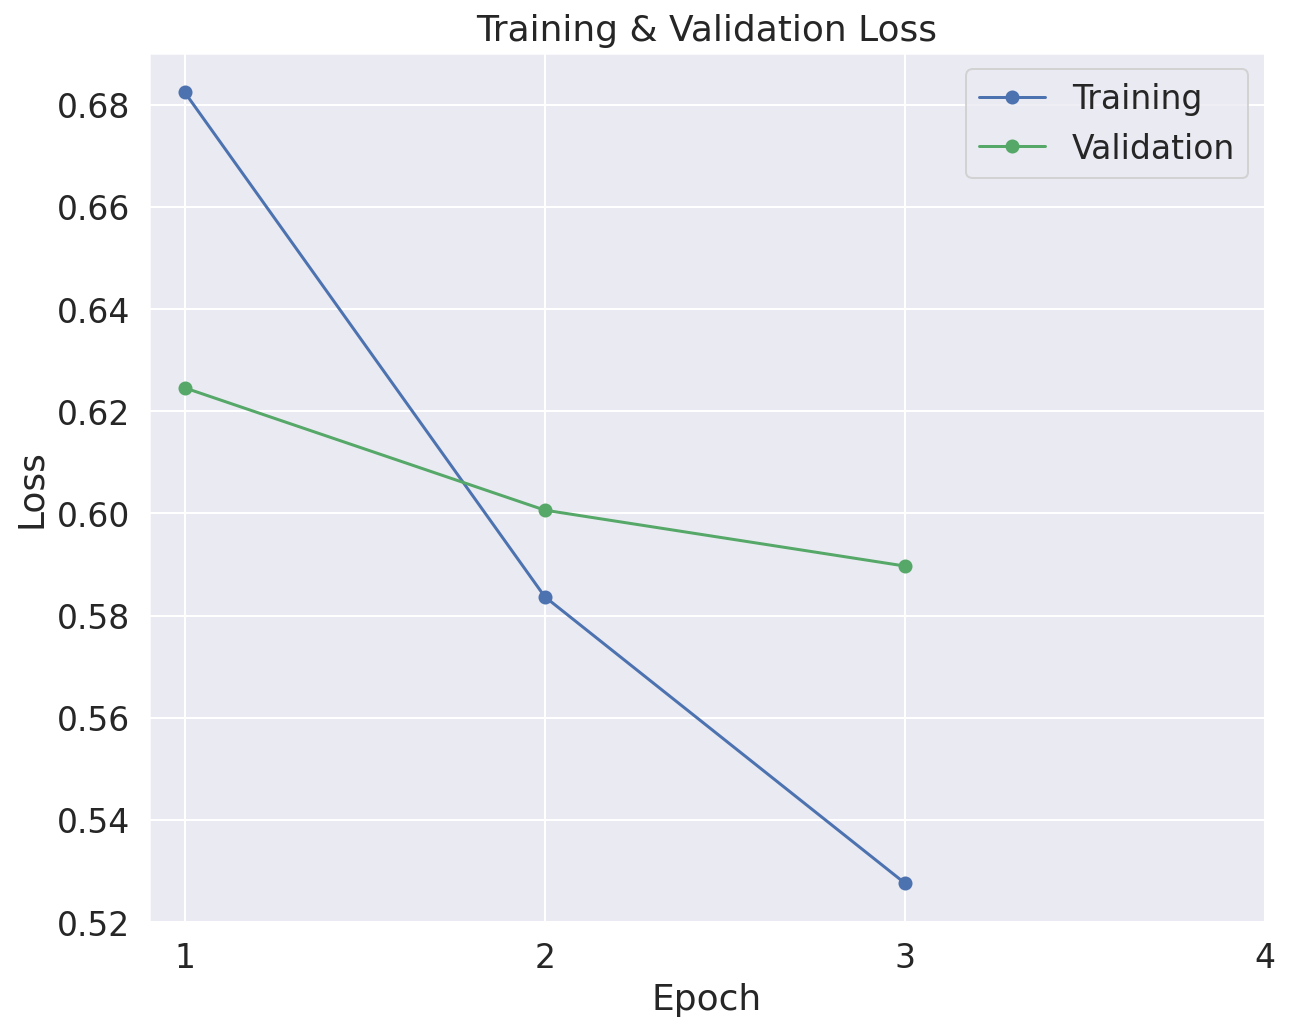

In [ ]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,8)

plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])
plt.show()

In [ ]:
# 파라미터 표시 & transformer의 층 구조
params = list(model.named_parameters())
print('GPT-2 모델은 {:} 개의 다른 파라미터를 갖습니다.\n'.format(len(params)))

print('==== Embedding Layer ====\n')
for p in params[0:2]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')
for p in params[2:14]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')
for p in params[-2:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

GPT-2 모델은 148 개의 다른 파라미터를 갖습니다.

==== Embedding Layer ====

transformer.wte.weight                                  (42003, 768)
transformer.wpe.weight                                   (2048, 768)

==== First Transformer ====

transformer.h.0.ln_1.weight                                   (768,)
transformer.h.0.ln_1.bias                                     (768,)
transformer.h.0.attn.c_attn.weight                       (768, 2304)
transformer.h.0.attn.c_attn.bias                             (2304,)
transformer.h.0.attn.c_proj.weight                        (768, 768)
transformer.h.0.attn.c_proj.bias                              (768,)
transformer.h.0.ln_2.weight                                   (768,)
transformer.h.0.ln_2.bias                                     (768,)
transformer.h.0.mlp.c_fc.weight                          (768, 3072)
transformer.h.0.mlp.c_fc.bias                                (3072,)
transformer.h.0.mlp.c_proj.weight                        (3072, 768)
transformer.h

In [ ]:
# 모델 저장
output_dir = '/content/drive/MyDrive/model_save(v2 6epoch까지학습)'

# 디렉토리 만들기
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
print("Saving model to %s" % output_dir)

# 모델, 토크나이저 등 저장
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(output_dir)
tokenizer_gpt3.save_pretrained(output_dir)

Saving model to /content/drive/MyDrive/model_save(v2 6epoch까지학습)


('/content/drive/MyDrive/model_save(v2 6epoch까지학습)/tokenizer_config.json',
 '/content/drive/MyDrive/model_save(v2 6epoch까지학습)/special_tokens_map.json',
 '/content/drive/MyDrive/model_save(v2 6epoch까지학습)/vocab.txt',
 '/content/drive/MyDrive/model_save(v2 6epoch까지학습)/added_tokens.json',
 '/content/drive/MyDrive/model_save(v2 6epoch까지학습)/tokenizer.json')